In [70]:
import json
import matplotlib.pyplot as plt

# Load the data from the JSON file
with open('AF.json') as f:
    data = json.load(f)


In [71]:
pjts = data["projects"]["projectsarchives"]

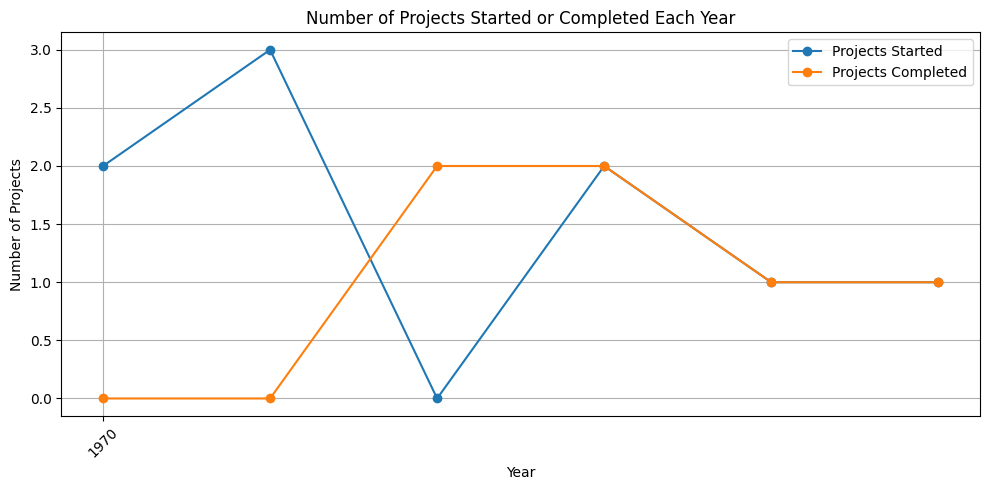

In [72]:
from collections import Counter
import matplotlib.dates as mdates

# Extract start and end dates
start_dates = [project['start_date'][:4] for project in data["projects"]["projectsarchives"] if 'start_date' in project]
end_dates = [project['end_date'][:4] for project in data["projects"]["projectsarchives"] if 'end_date' in project]

# Count the number of projects started and completed each year
start_count = Counter(start_dates)
end_count = Counter(end_dates)

# Create lists of years and counts for plotting
years = sorted(set(start_dates + end_dates))
start_counts = [start_count[year] for year in years]
end_counts = [end_count[year] for year in years]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(years, start_counts, label='Projects Started', marker='o')
plt.plot(years, end_counts, label='Projects Completed', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.title('Number of Projects Started or Completed Each Year')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


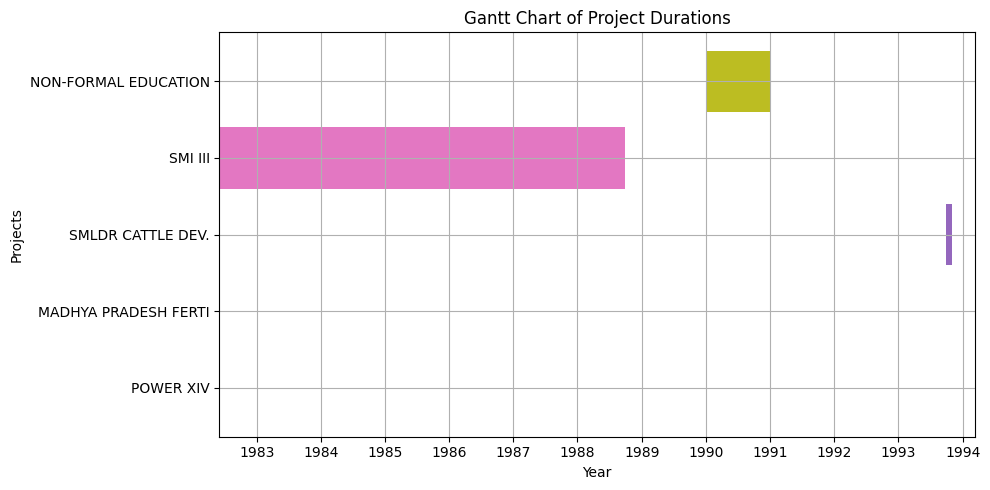

In [73]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

# Extract project names, start dates, and end dates
project_names = [project['project_name'] for project in data["projects"]["projectsarchives"]]
start_dates = [pd.to_datetime(project['start_date']) for project in data["projects"]["projectsarchives"]]
end_dates = [pd.to_datetime(project['end_date']) if 'end_date' in project else pd.NaT for project in data["projects"]["projectsarchives"]]

# Create a DataFrame for the Gantt chart
df = pd.DataFrame({
    'Project': project_names,
    'Start': start_dates,
    'End': end_dates
})

# Plot the Gantt chart
fig, ax = plt.subplots(figsize=(10, 5))

for i, row in df.iterrows():
    ax.barh(row['Project'], (row['End'] - row['Start']).days if pd.notna(row['End']) else 0, left=row['Start'])

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Year')
plt.ylabel('Projects')
plt.title('Gantt Chart of Project Durations')
plt.grid(True)
plt.tight_layout()
plt.show()


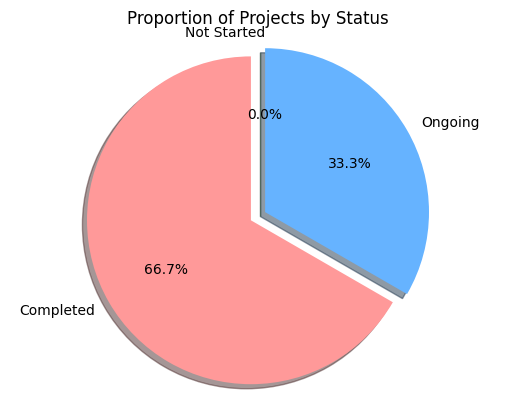

In [74]:
# Calculate the number of completed, ongoing, and not started projects
completed_projects = df['End'].notna().sum()
ongoing_projects = df['End'].isna().sum()
not_started_projects = 0  # Assuming all projects have at least started

# Create a pie chart
labels = ['Completed', 'Ongoing', 'Not Started']
sizes = [completed_projects, ongoing_projects, not_started_projects]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode the first slice (Completed)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Projects by Status')
plt.show()


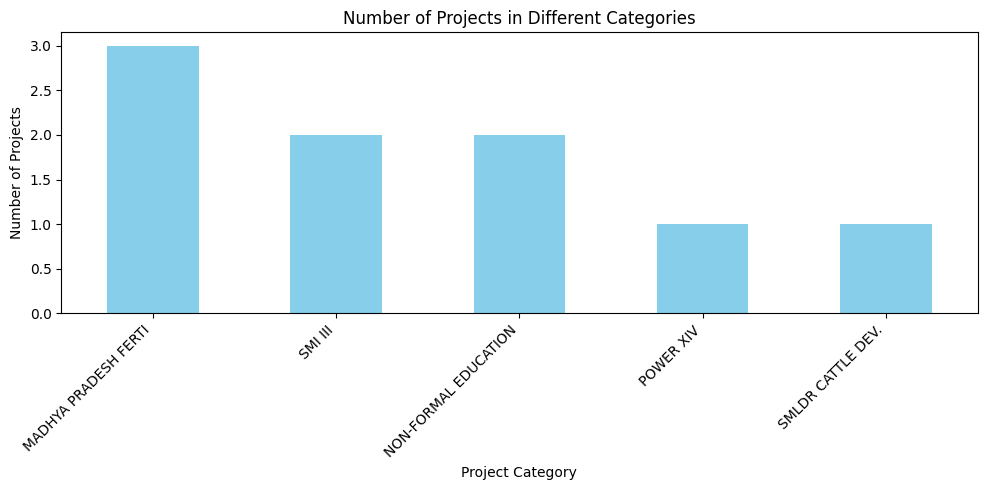

In [75]:
# Assuming 'project_name' represents different categories or sectors

# Count the number of projects in each category
category_counts = df['Project'].value_counts()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
category_counts.plot(kind='bar', ax=ax, color='skyblue')

plt.xlabel('Project Category')
plt.ylabel('Number of Projects')
plt.title('Number of Projects in Different Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# History Indicator Data

In [76]:
b = data["indicator_data"]["jsonGraph"]["indicatorData"]['AF']["EG.ELC.RNWX.ZS"]
if b.values() =="{'$type': 'atom'}":
    print("not none")
else:
    print("none")


none


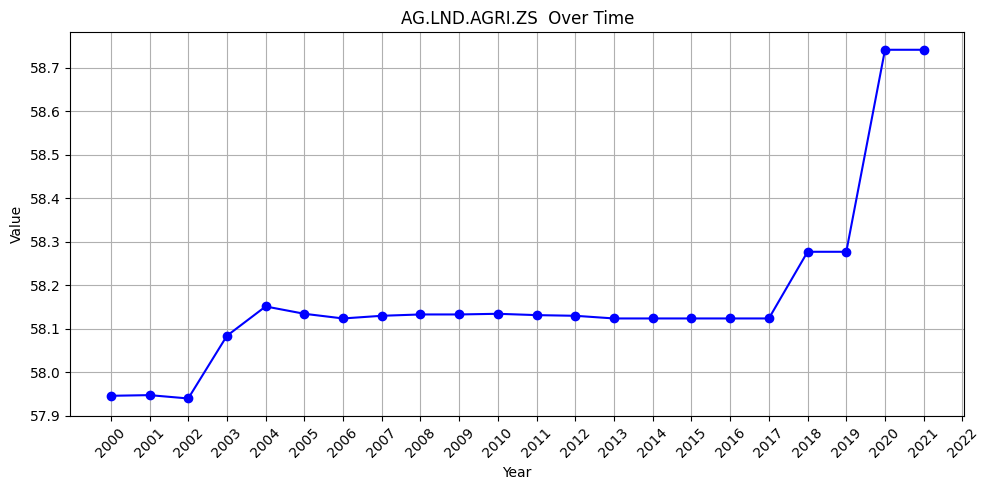

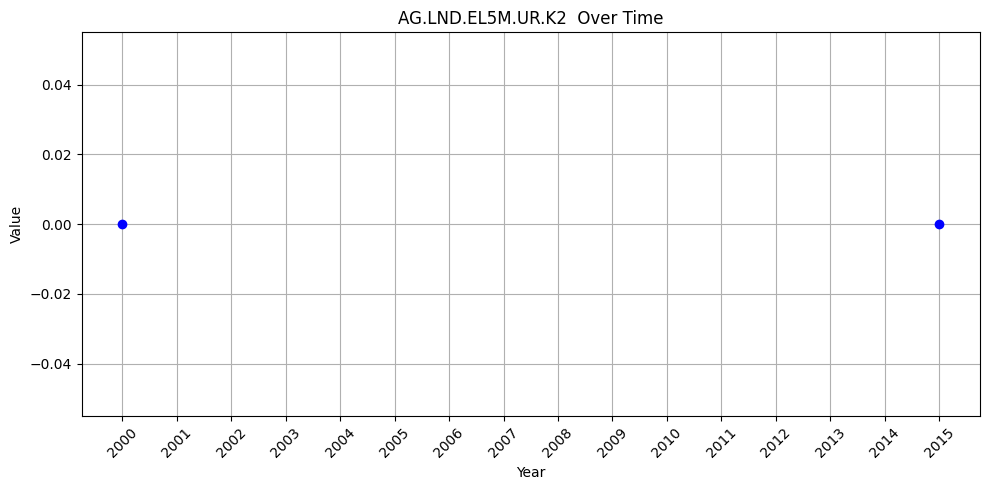

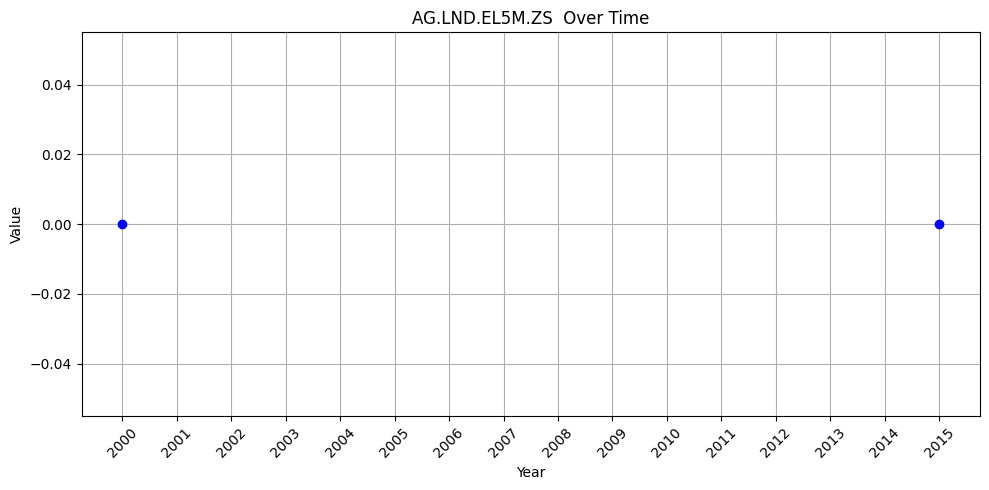

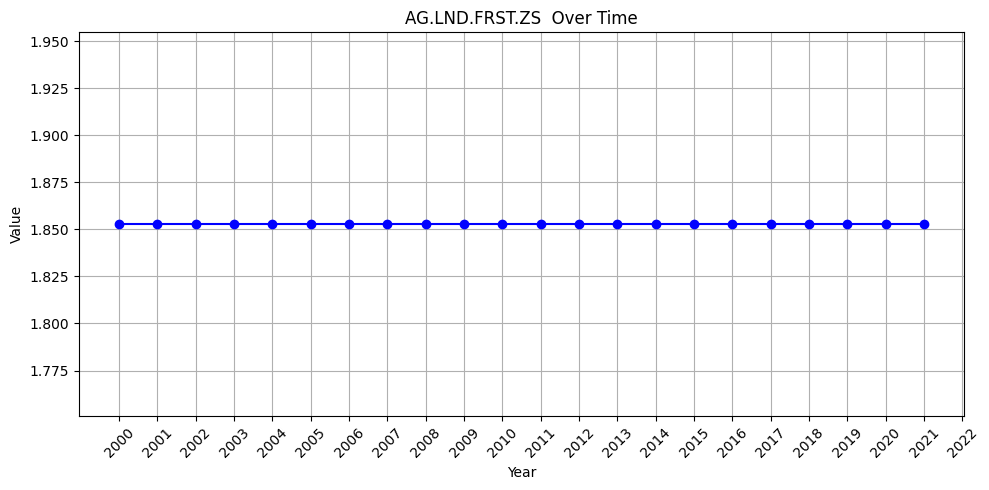

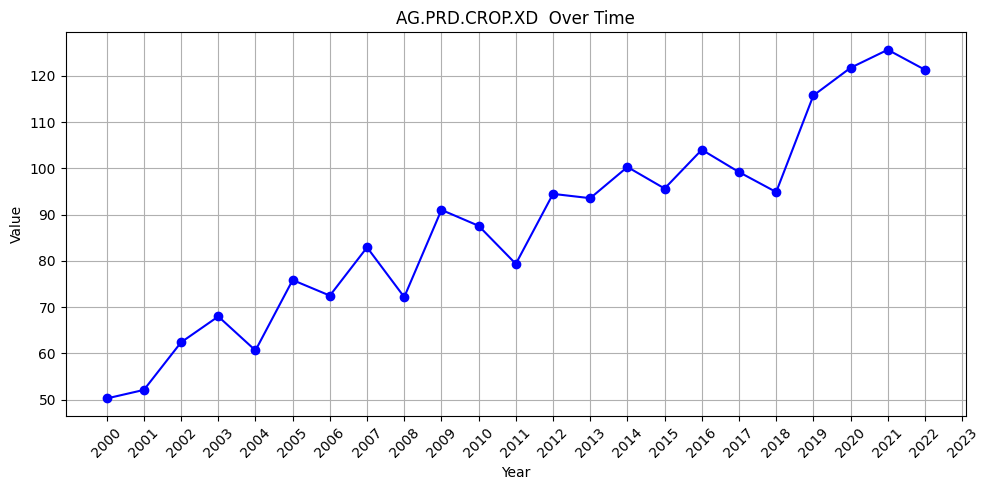

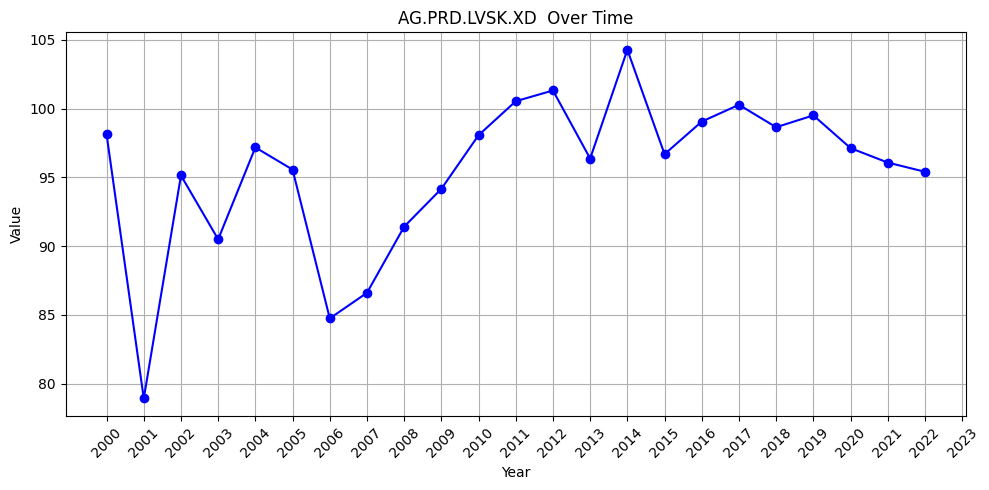

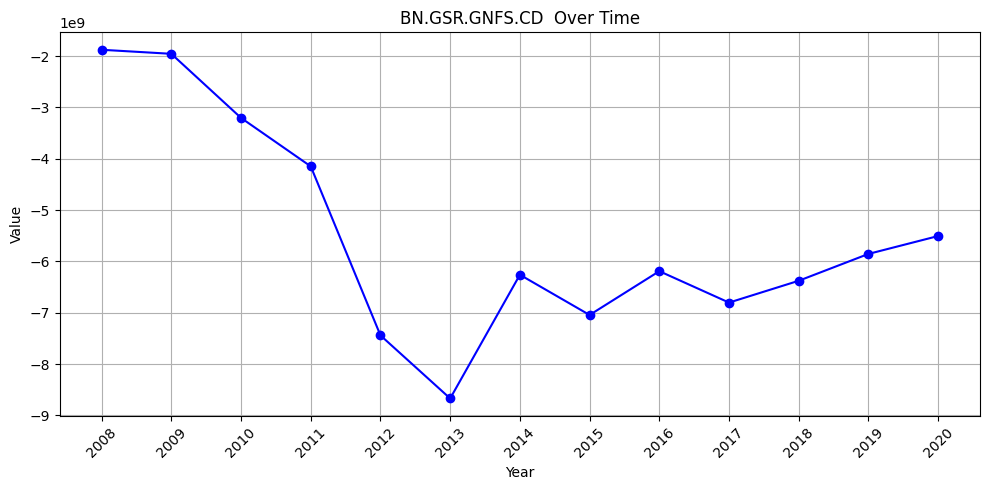

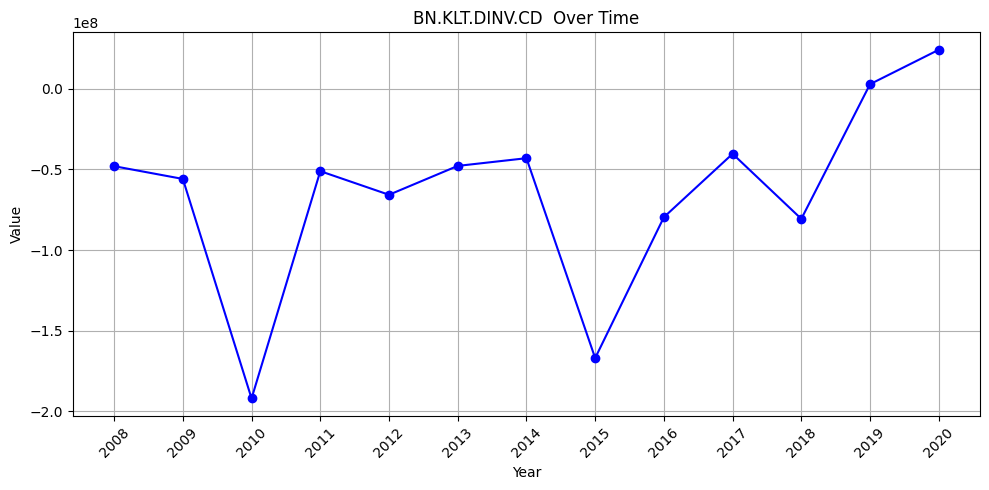

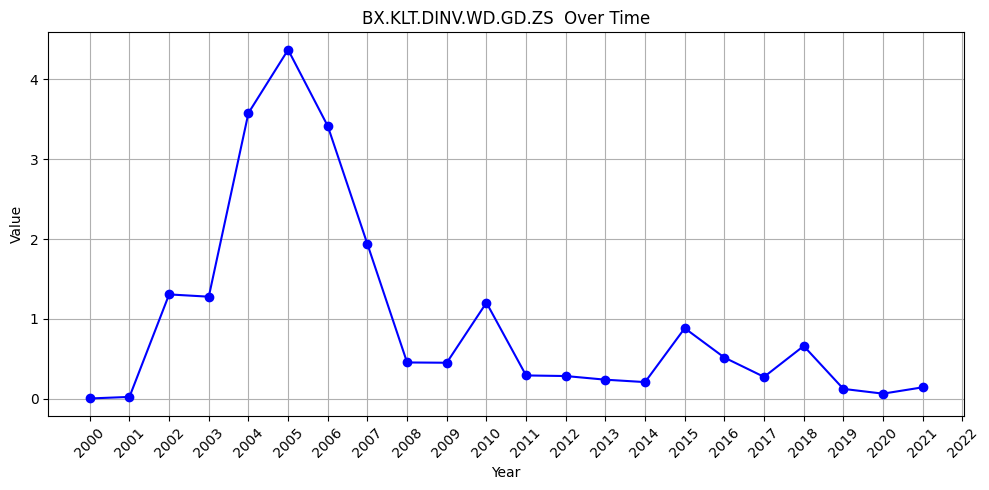

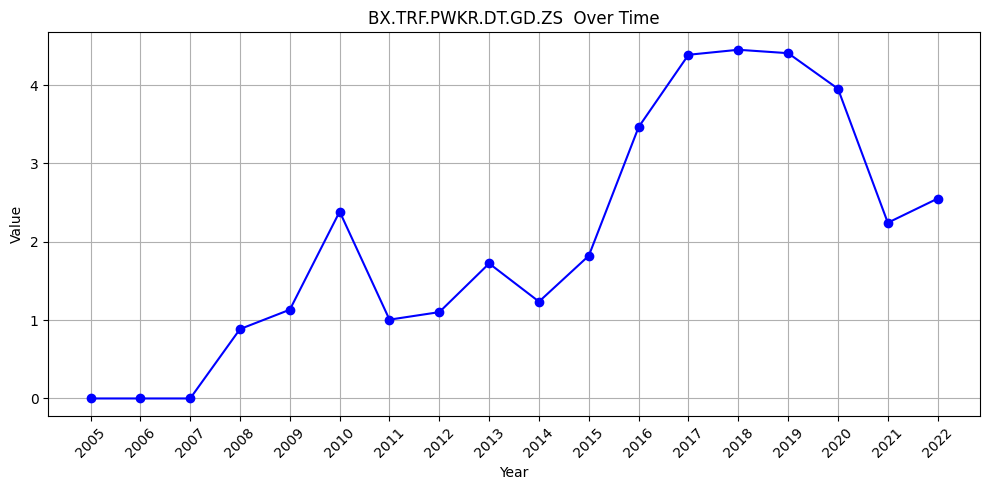

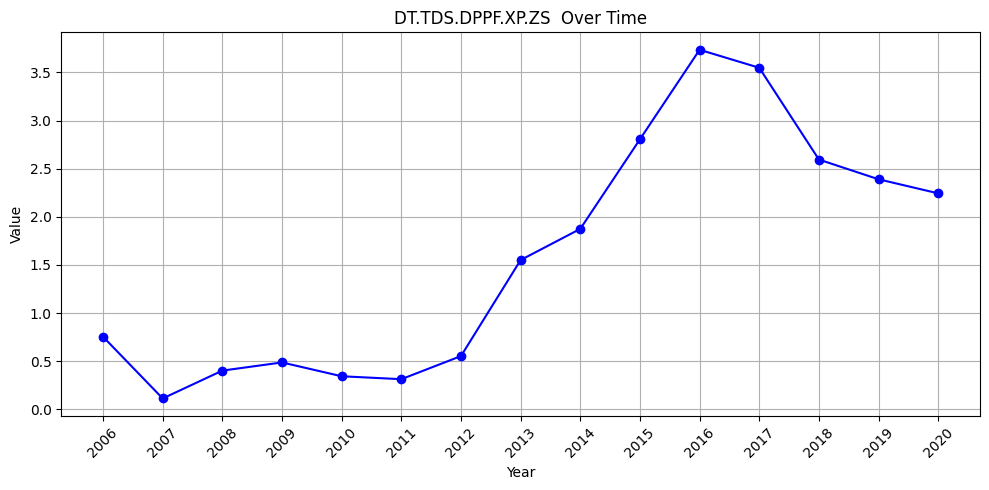

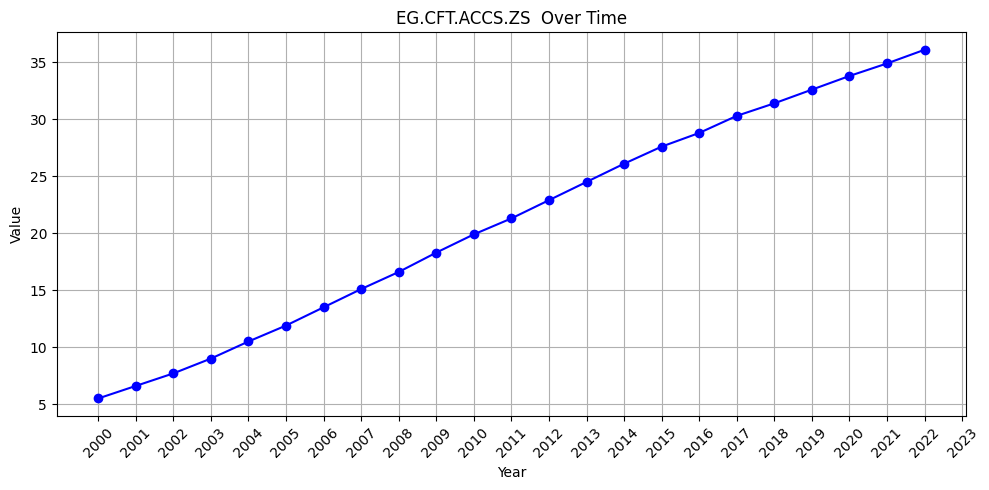

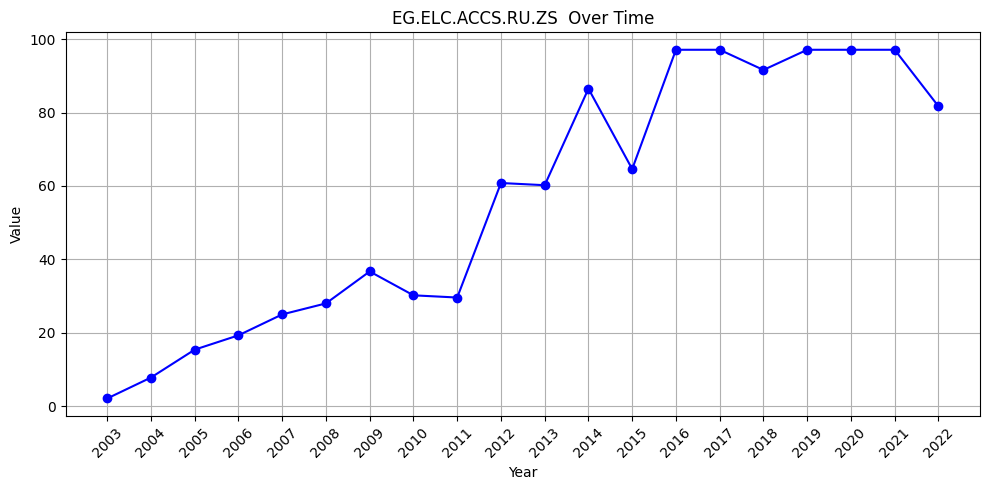

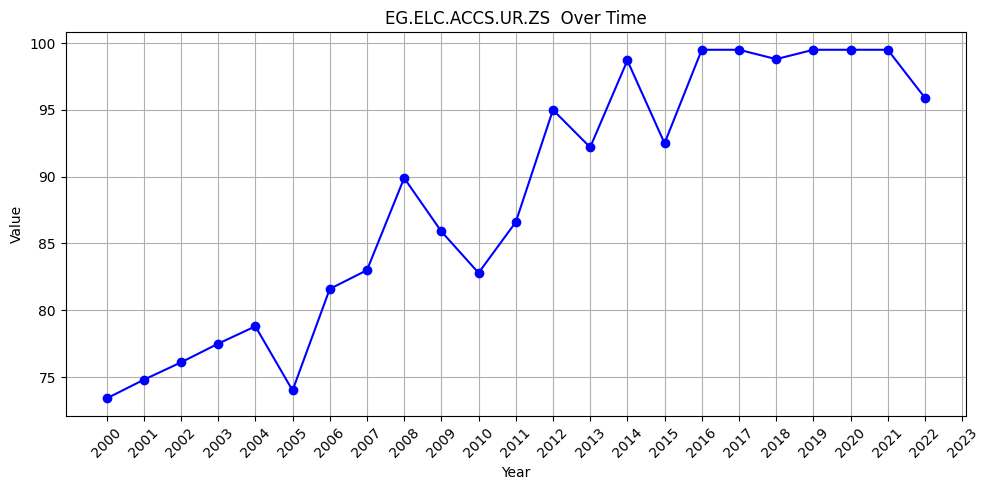

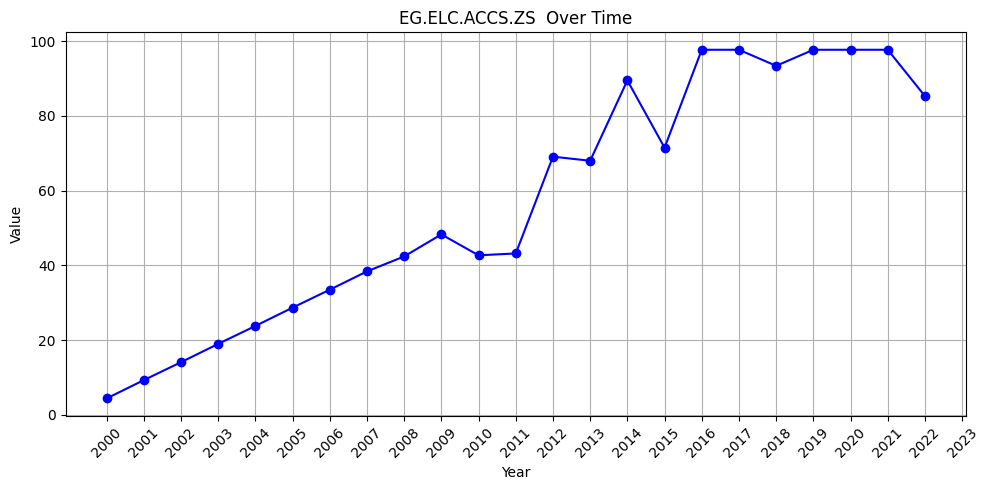

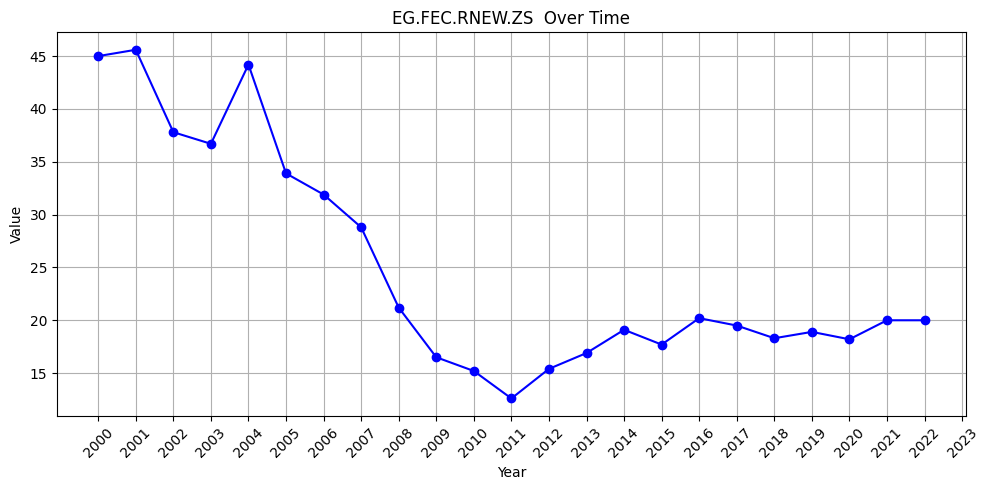

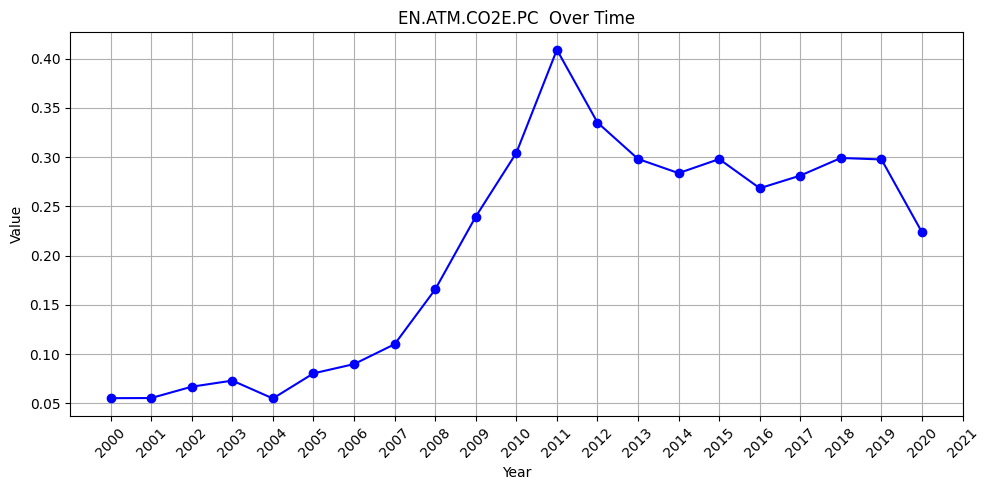

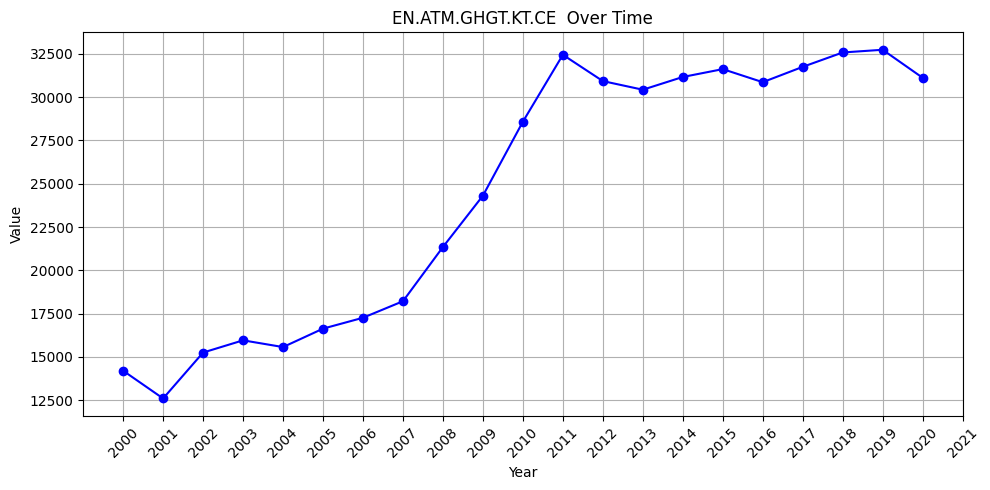

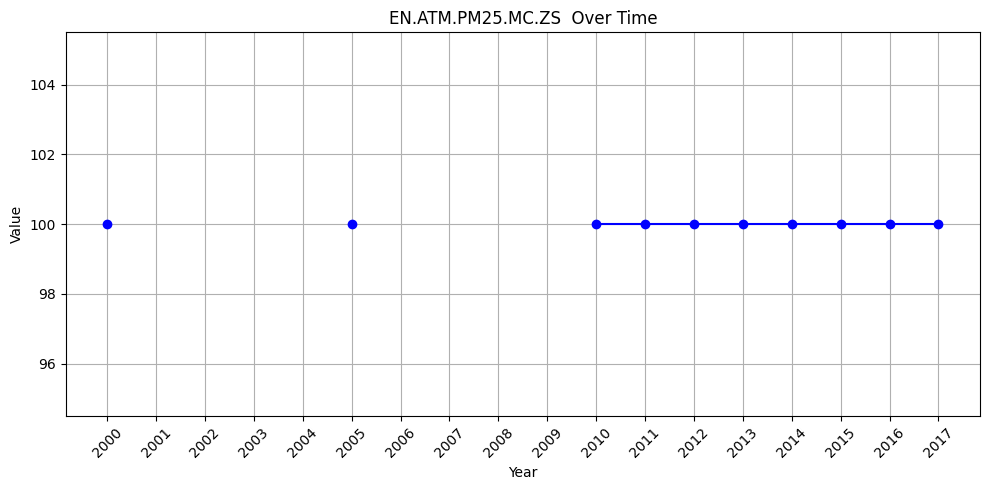

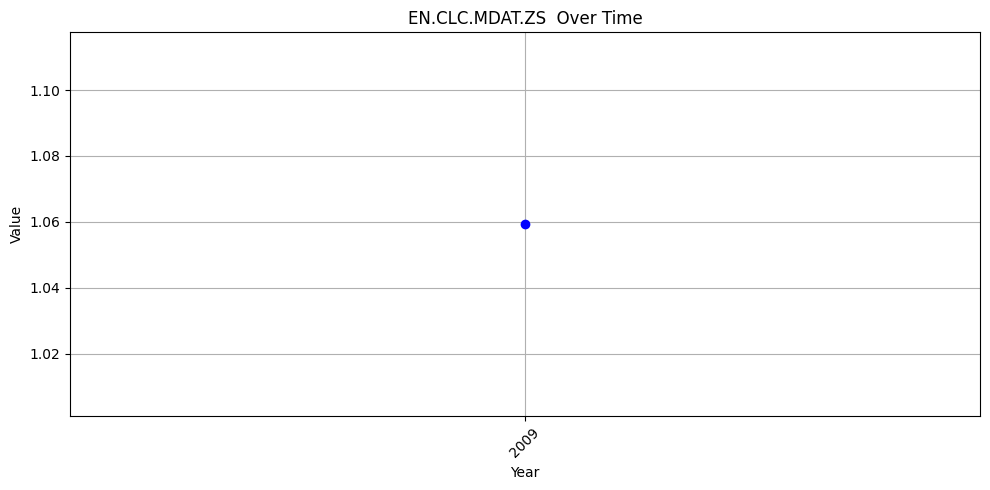

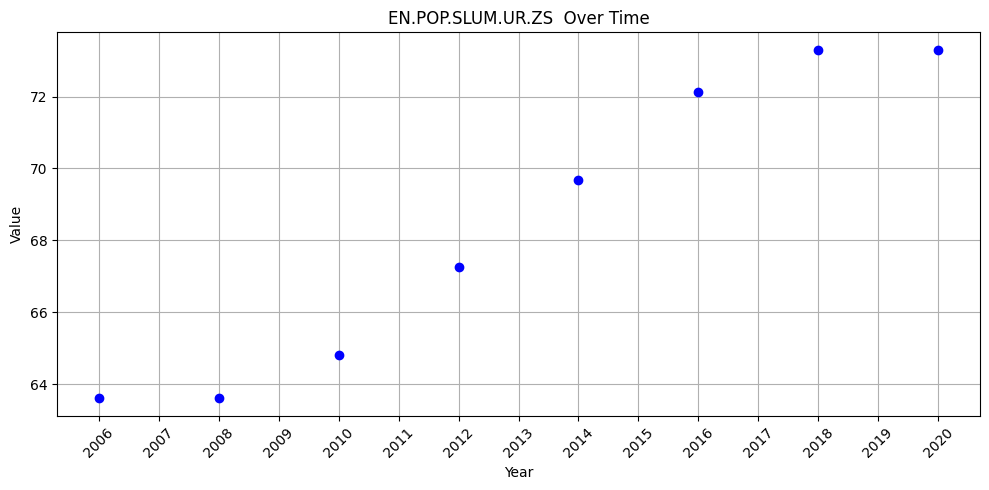

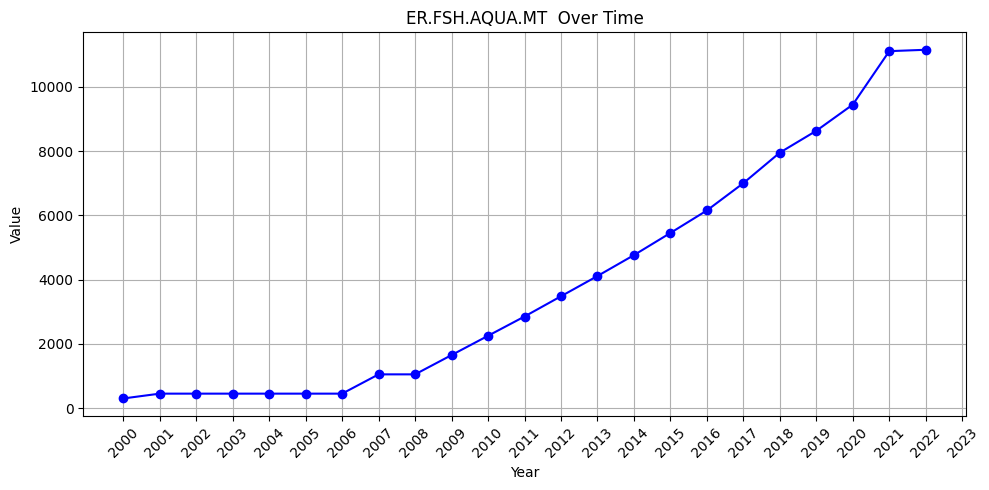

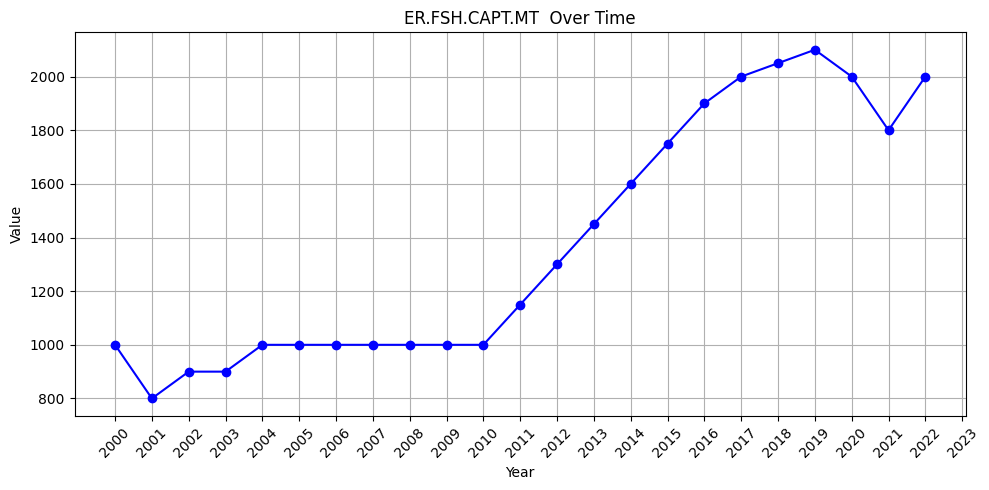

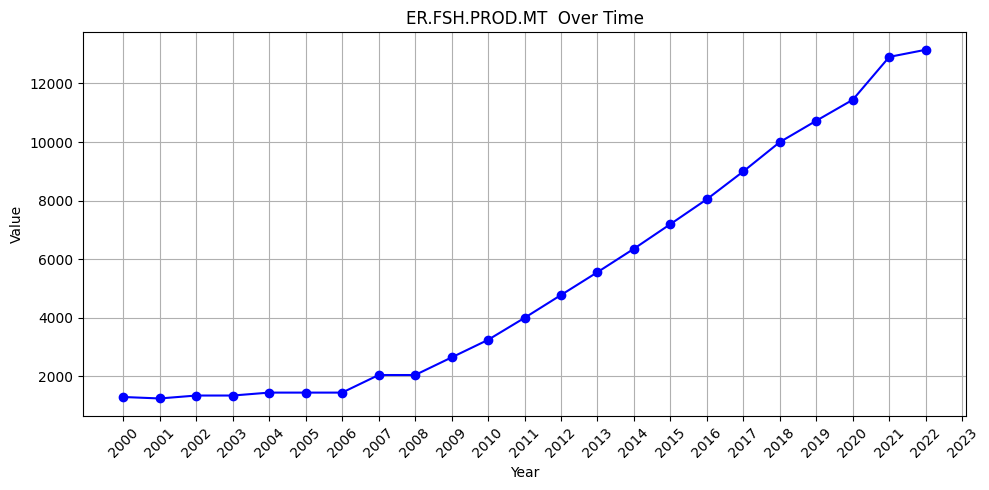

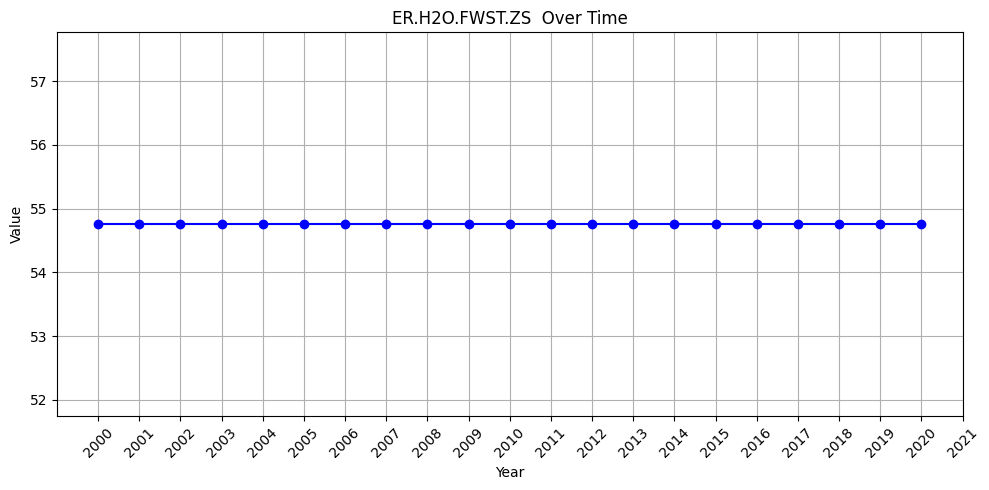

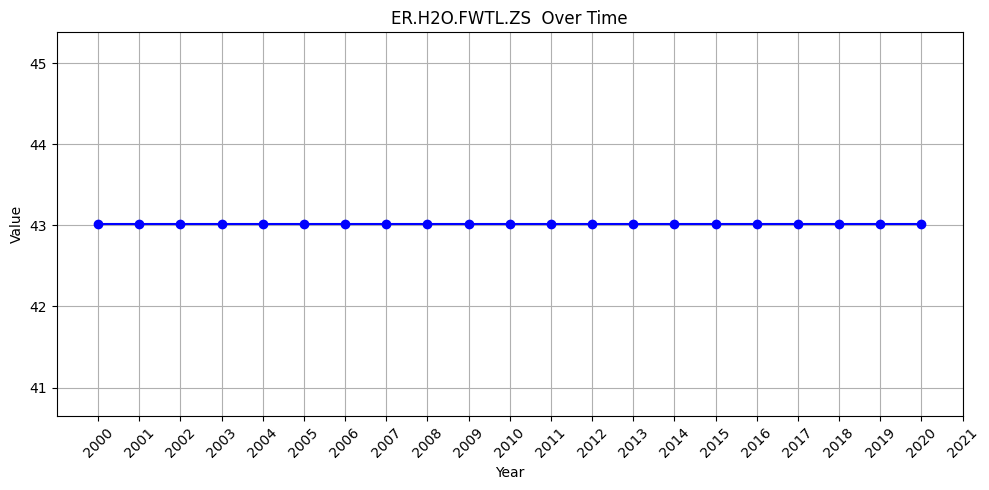

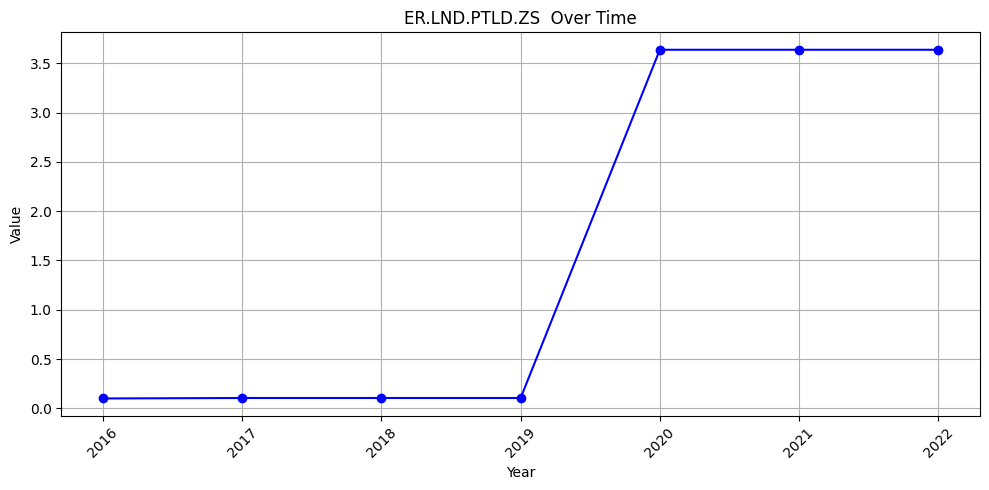

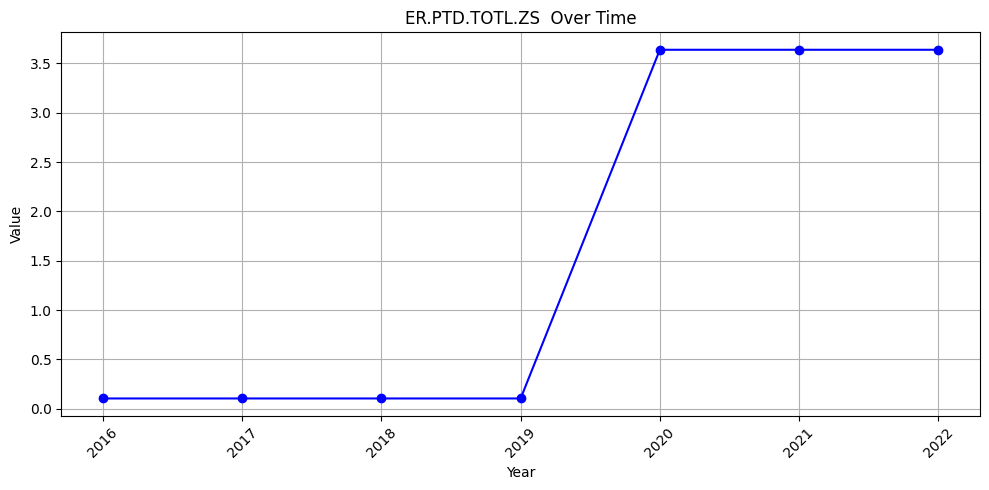

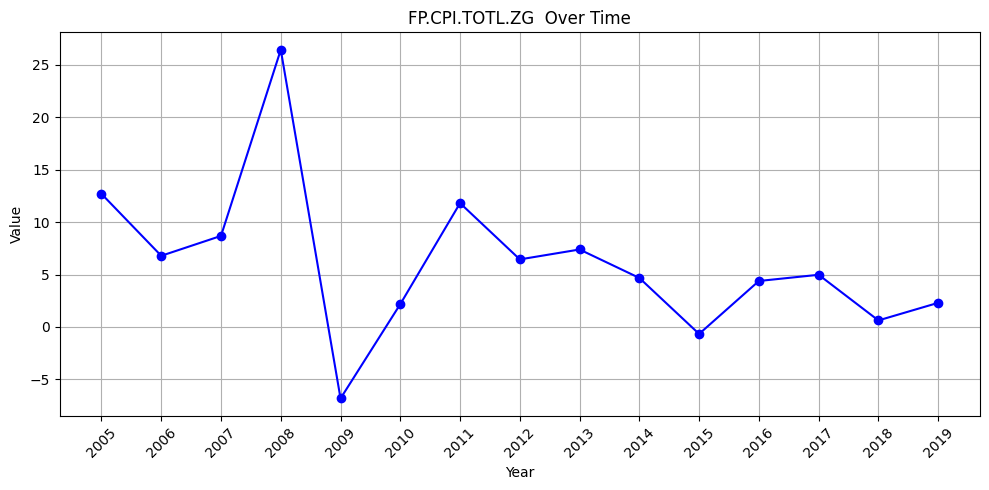

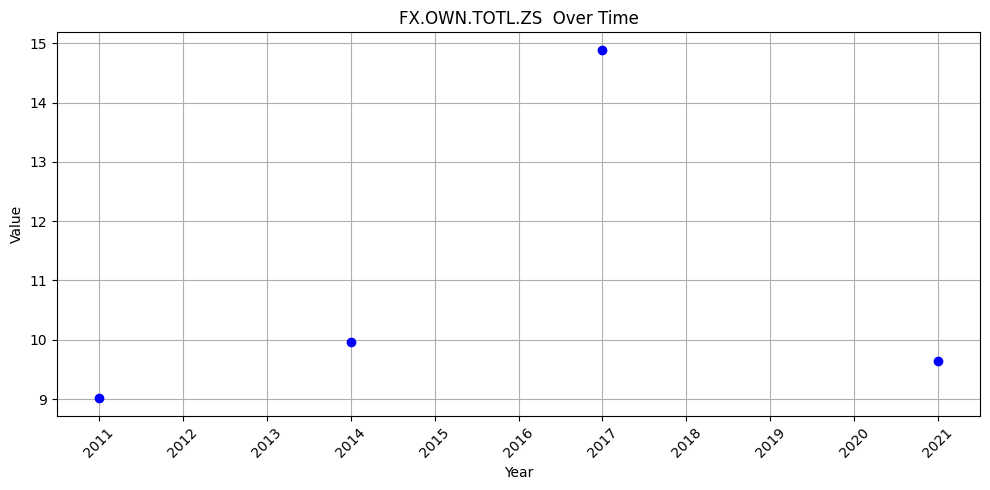

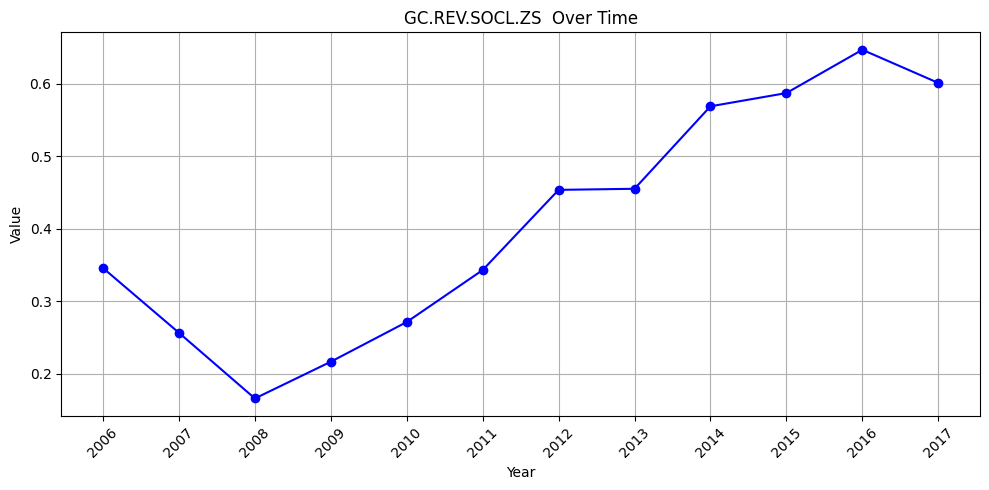

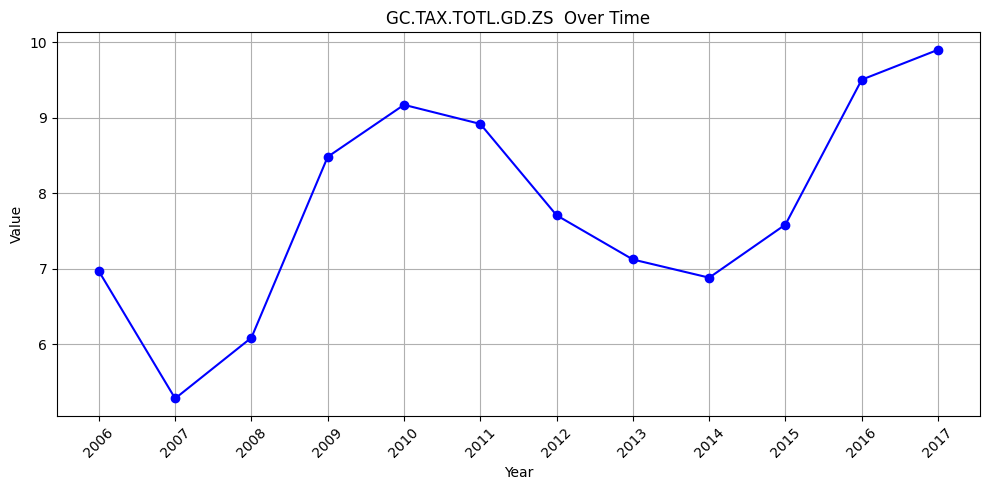

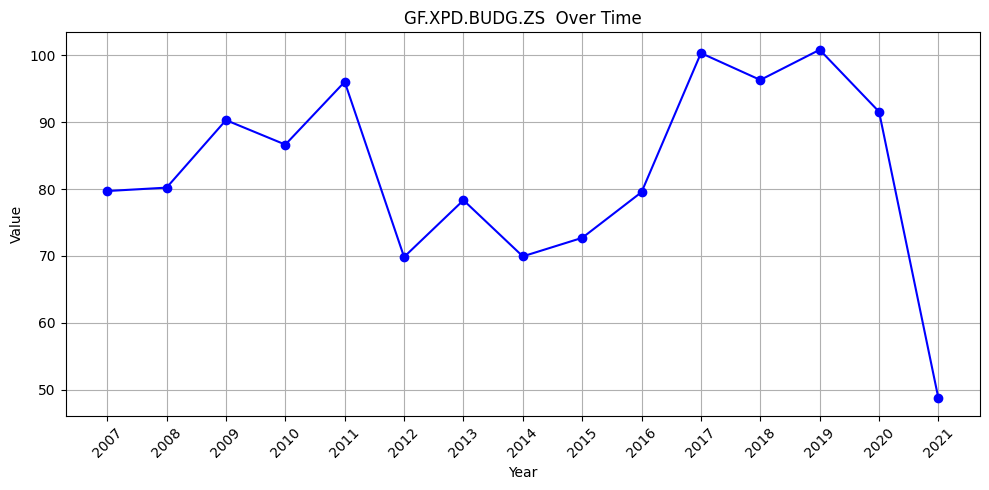

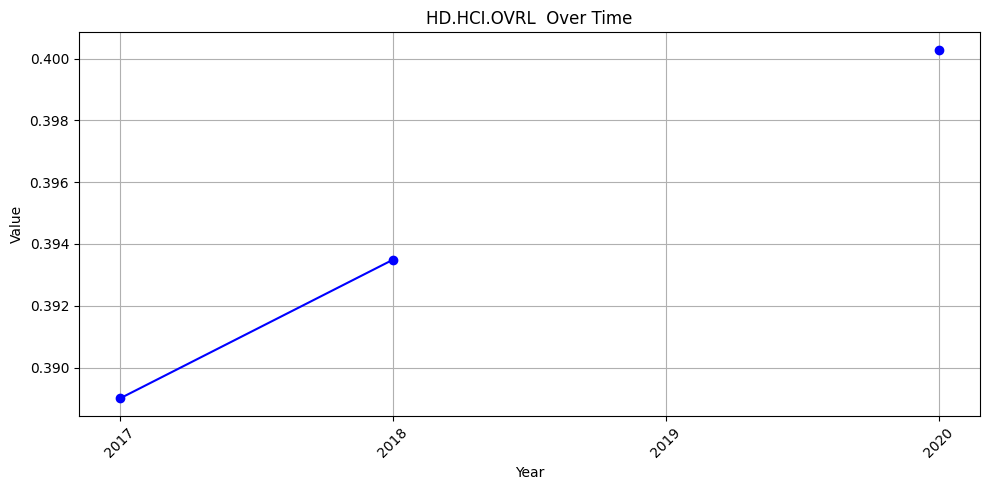

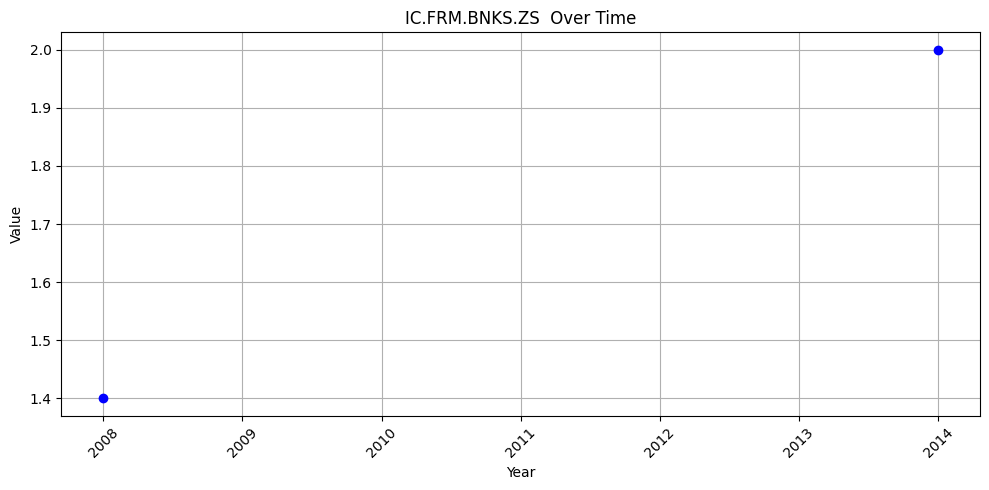

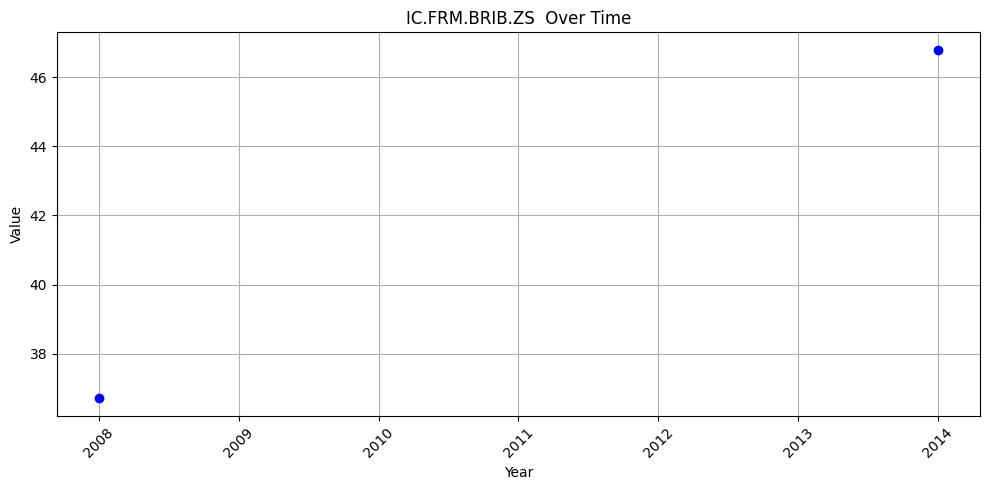

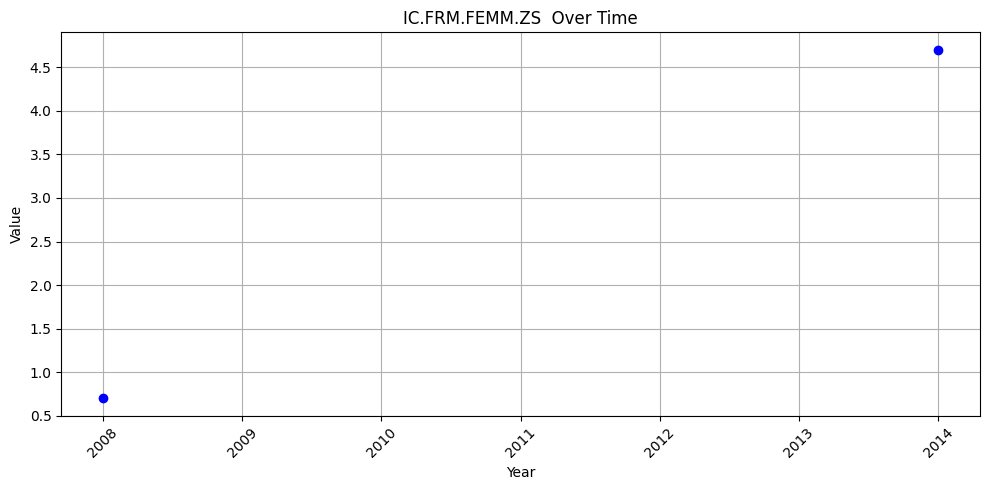

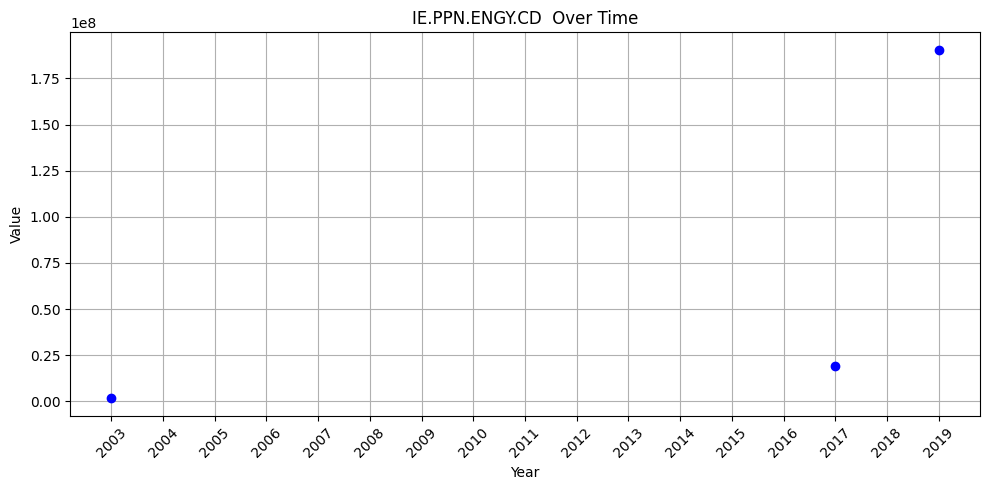

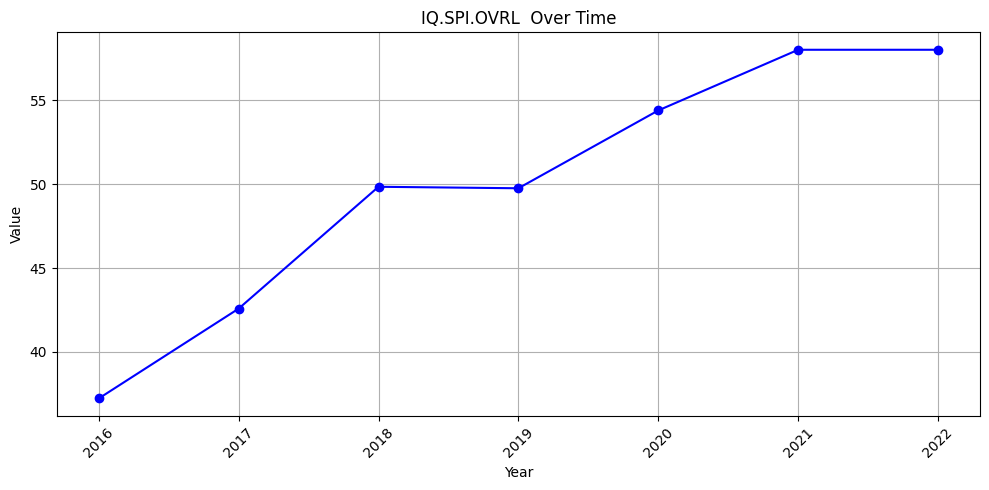

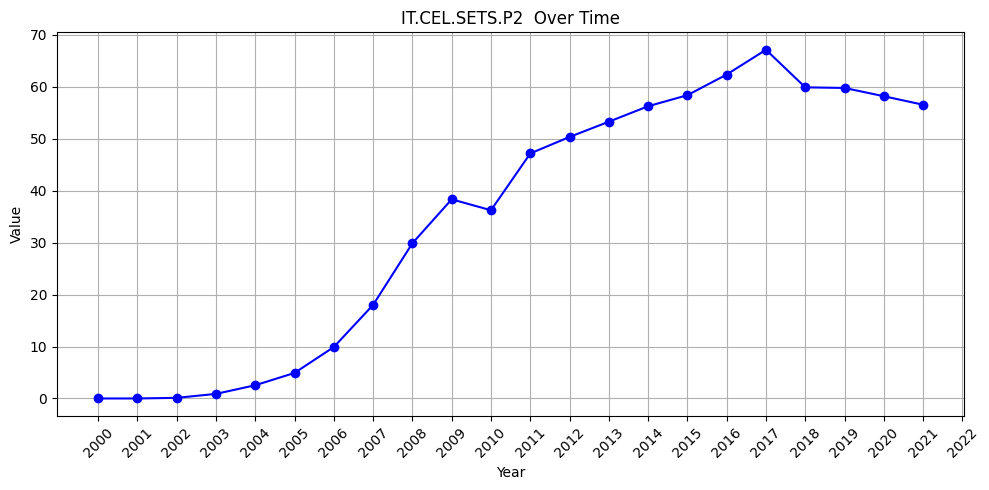

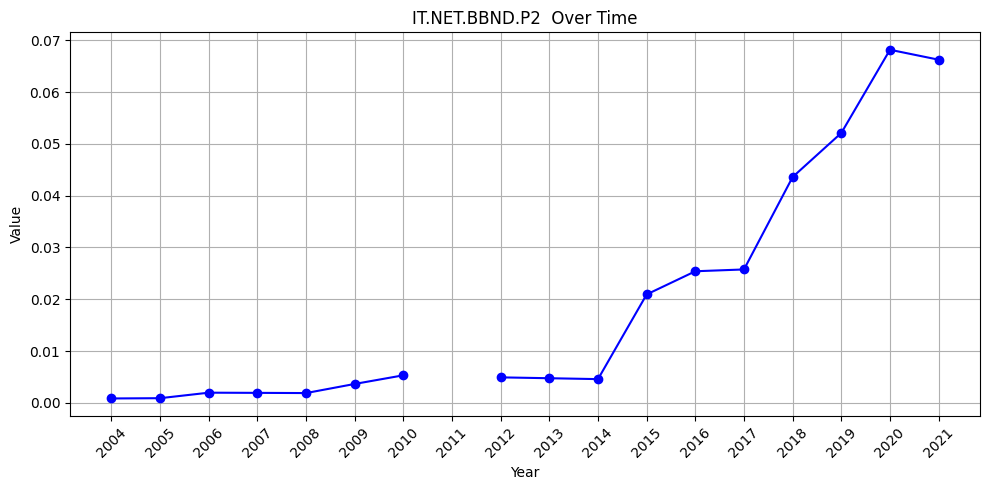

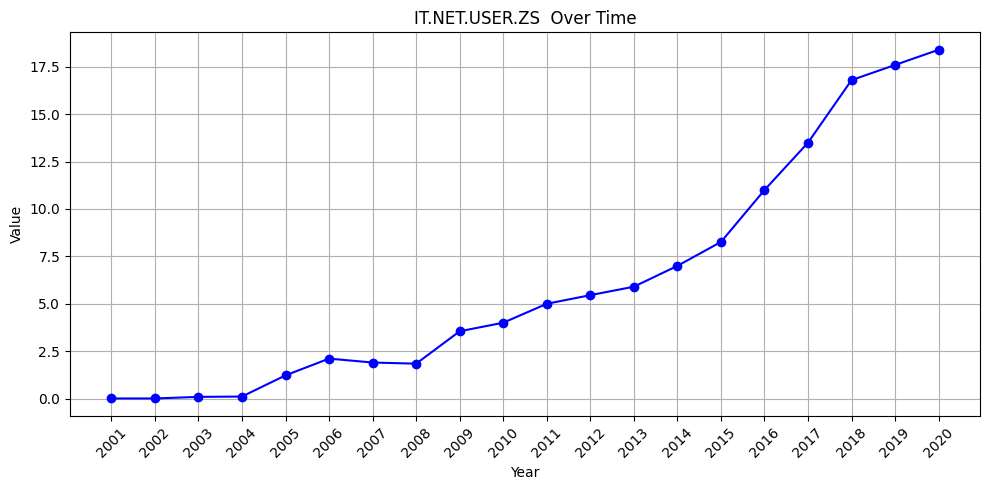

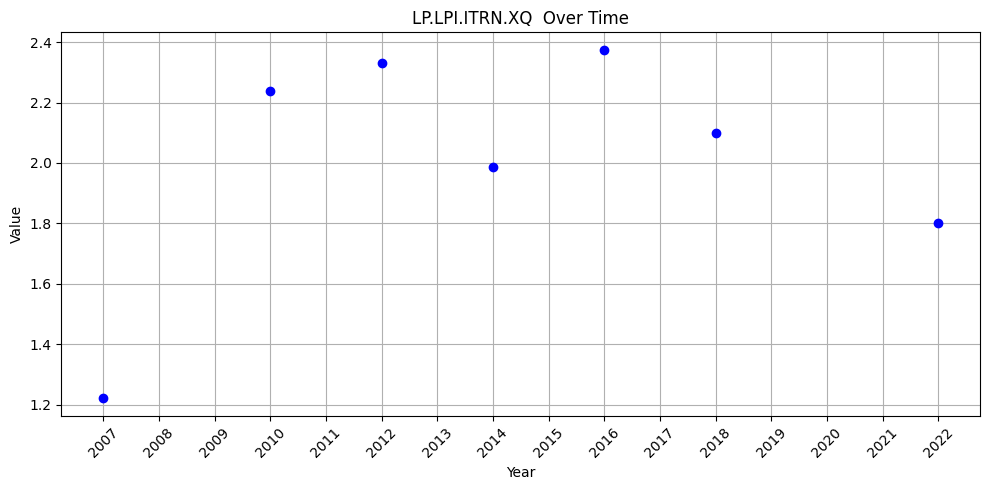

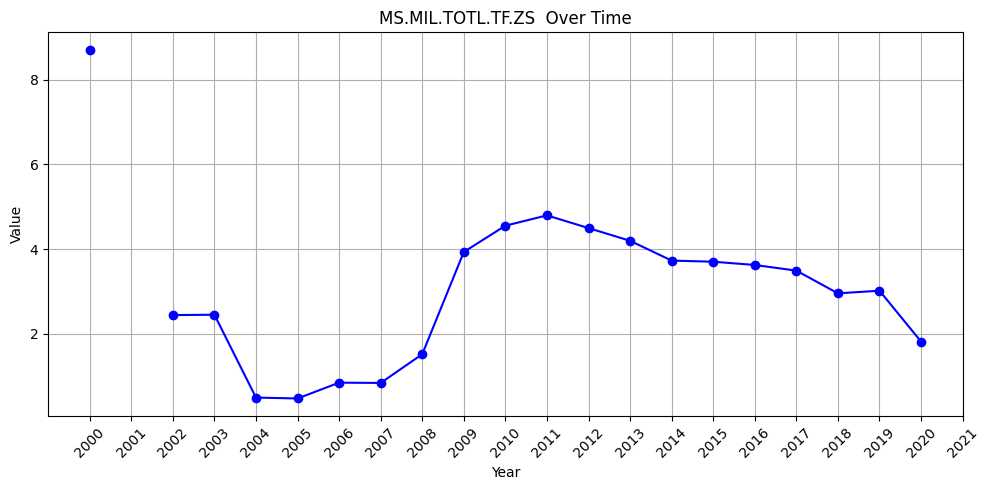

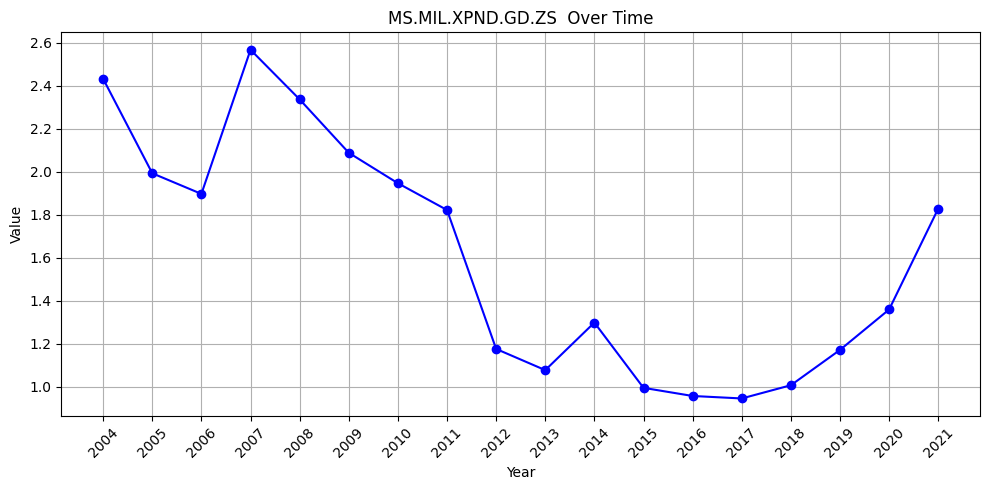

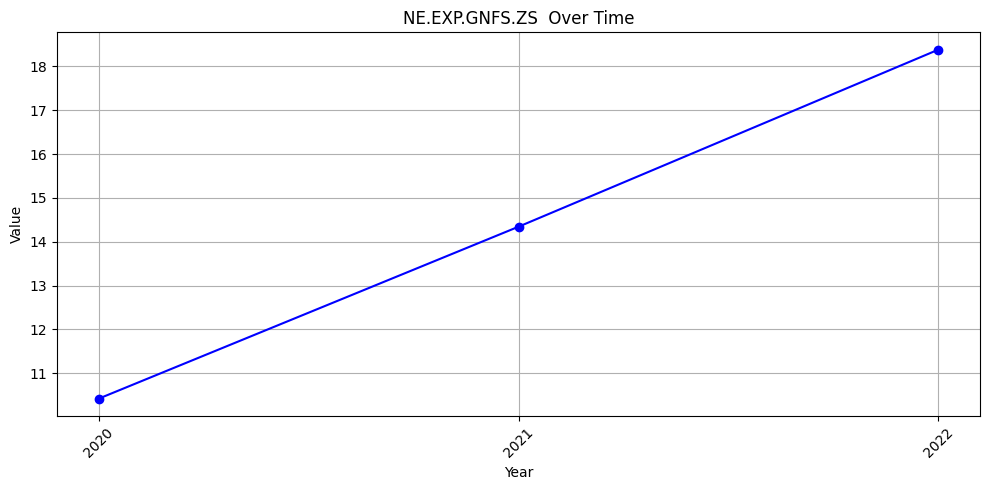

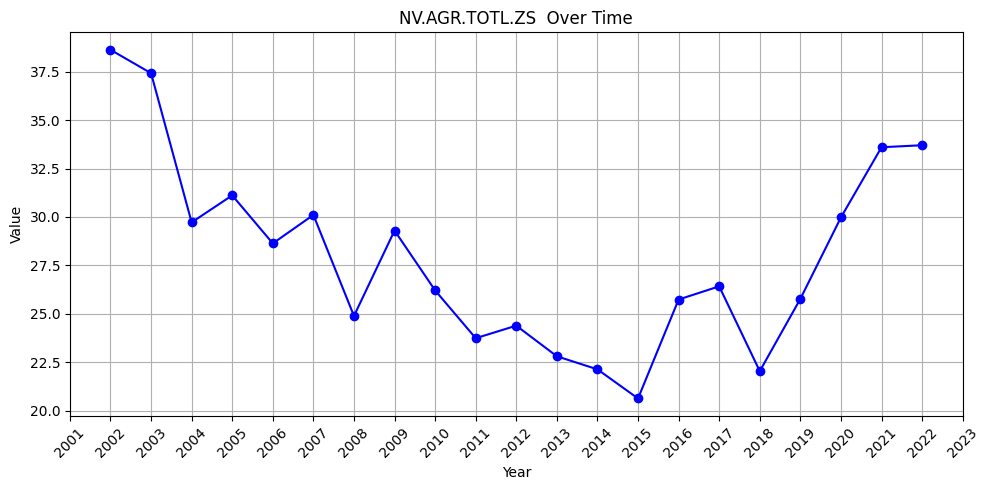

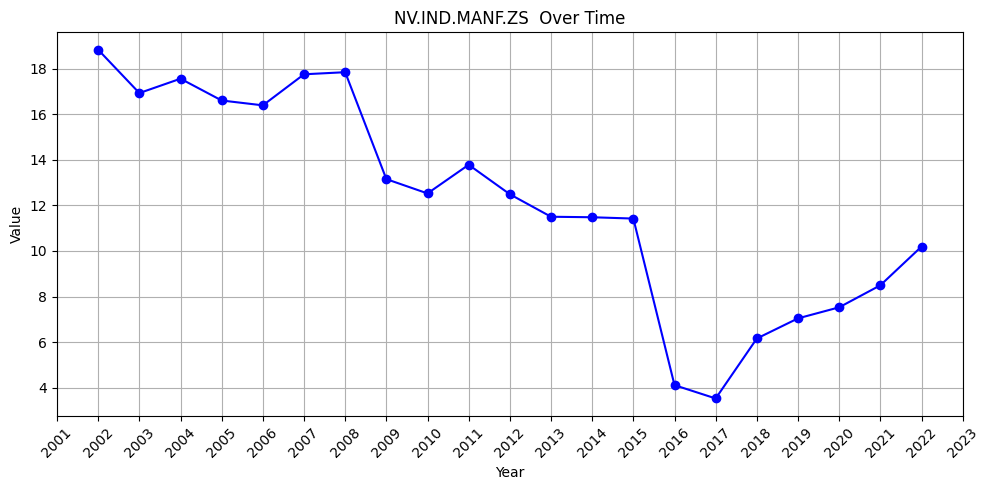

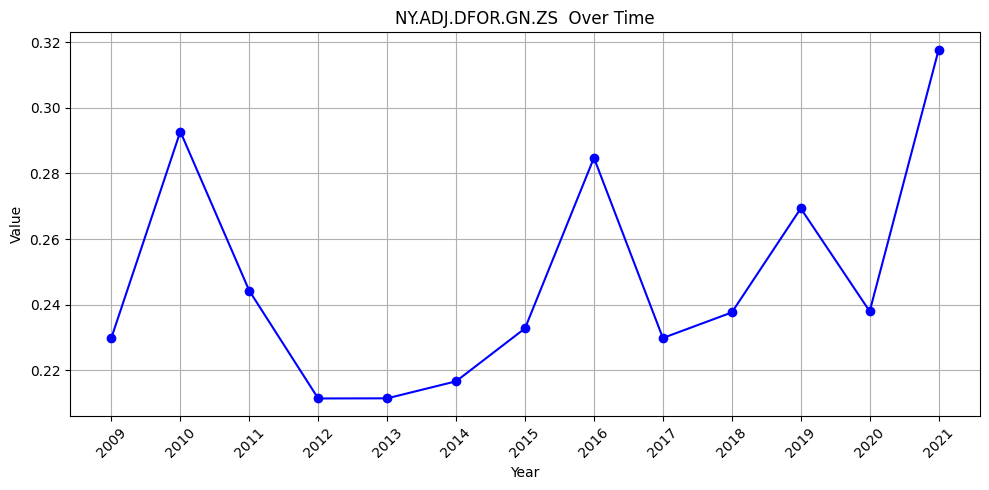

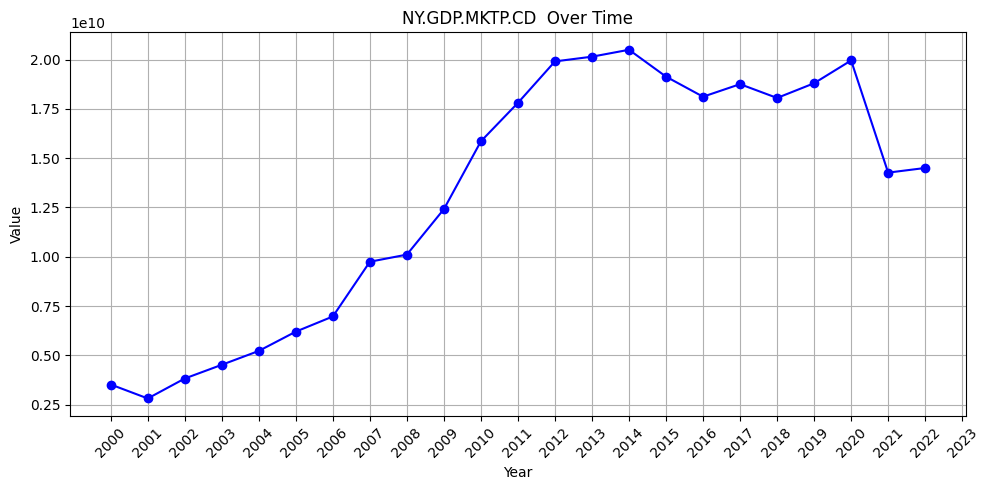

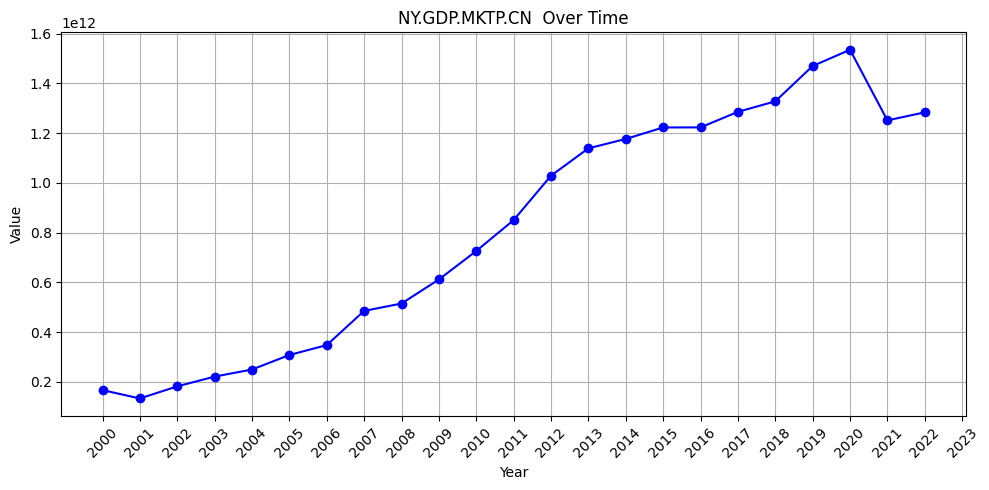

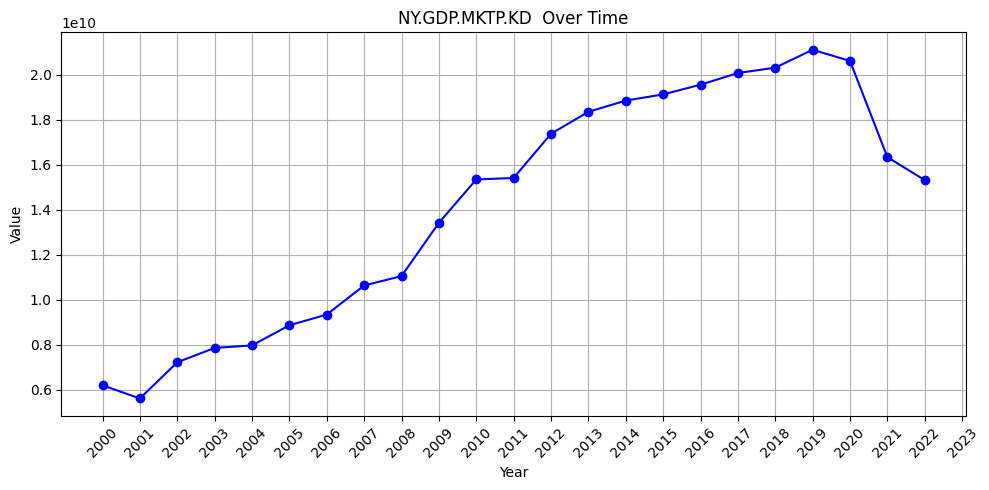

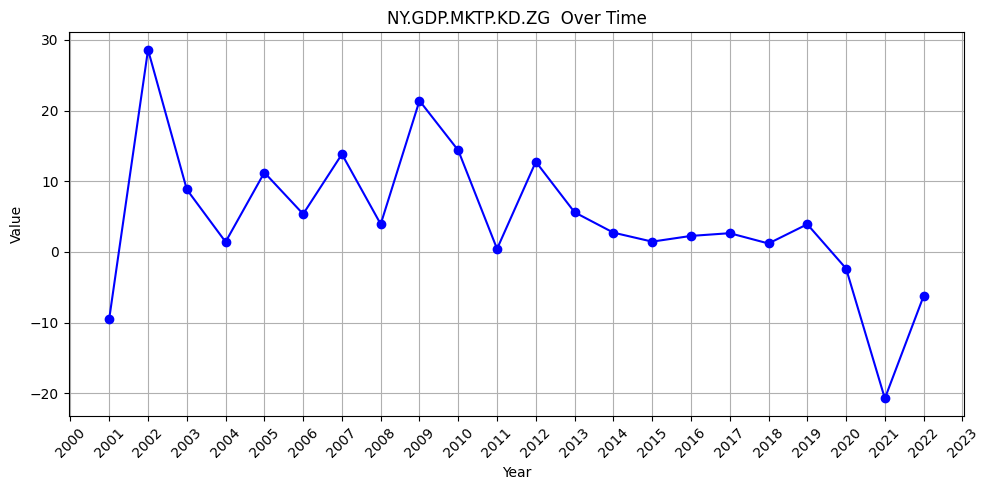

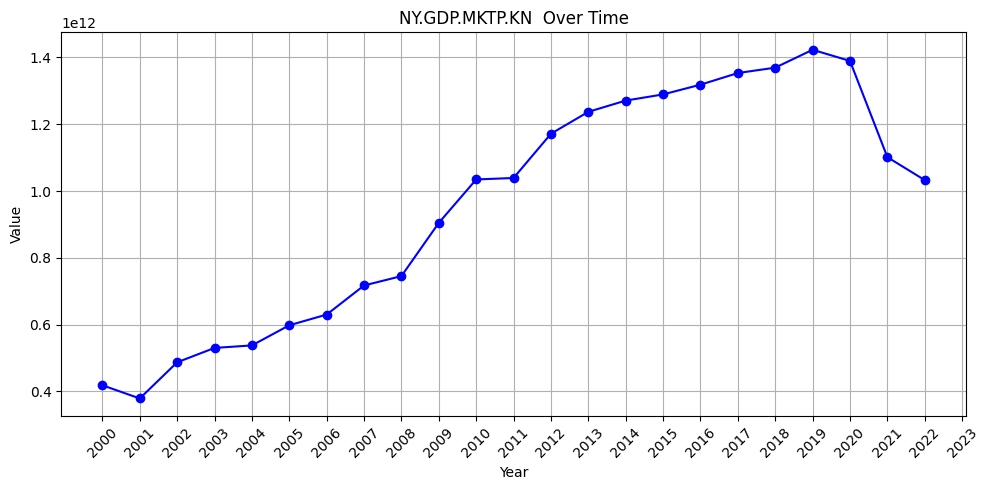

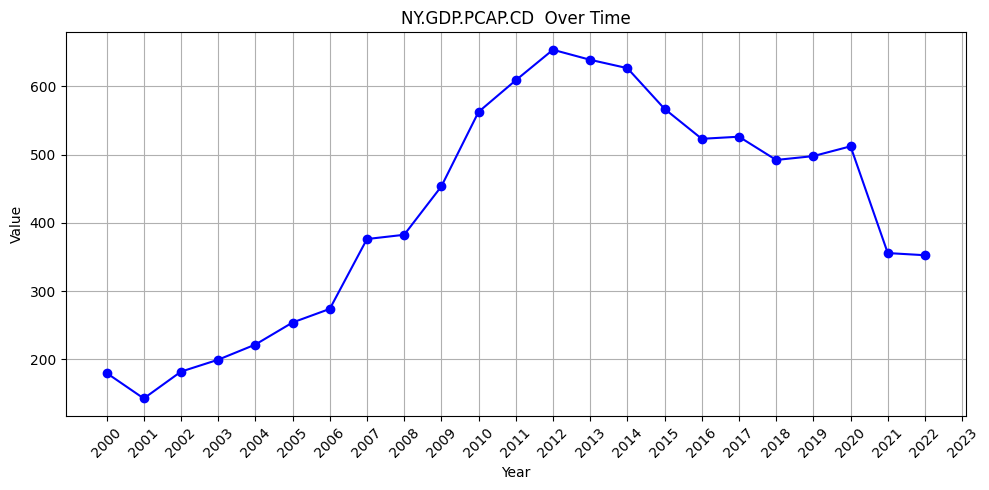

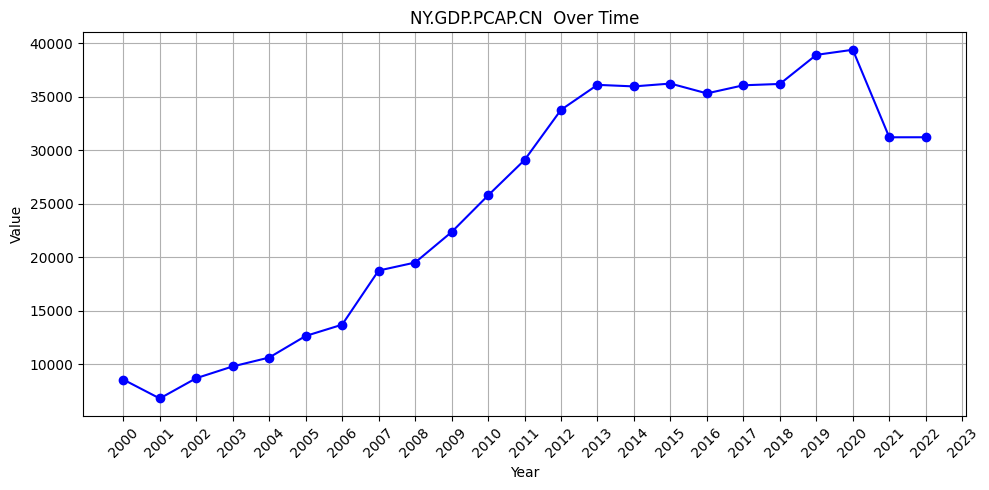

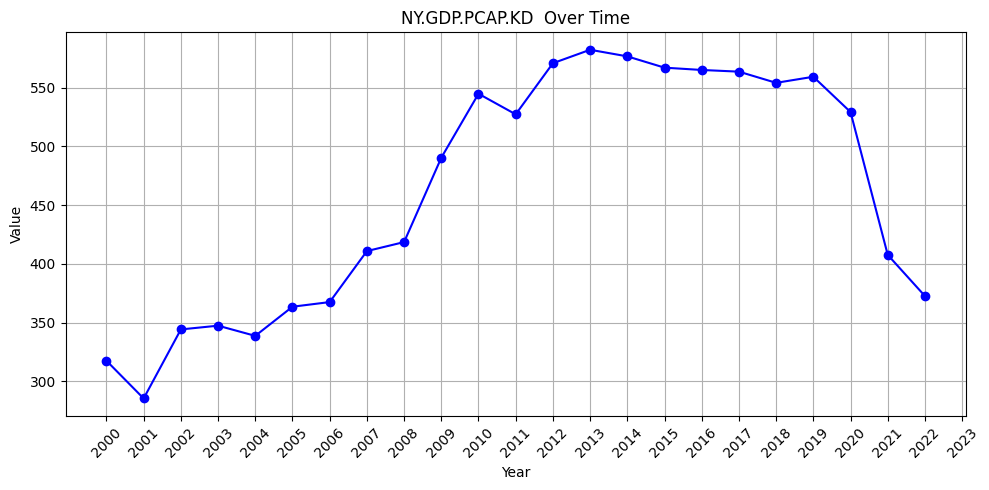

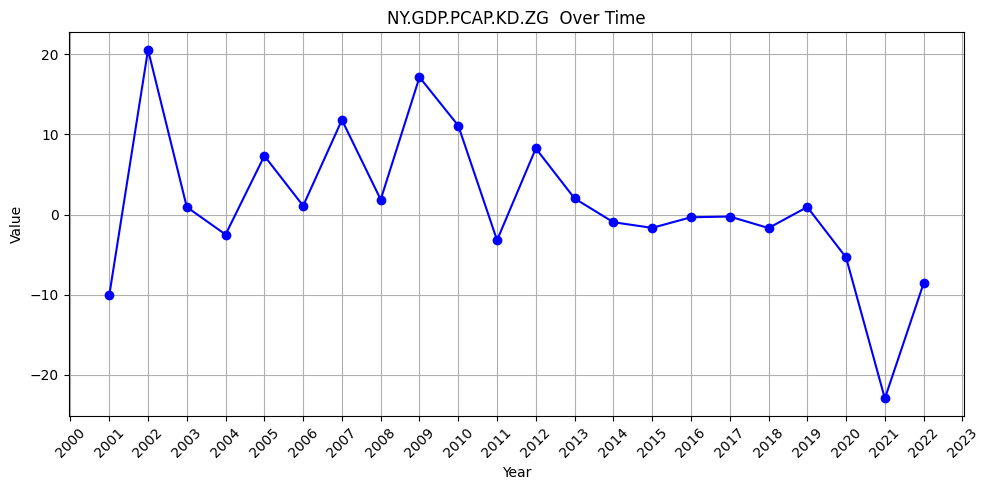

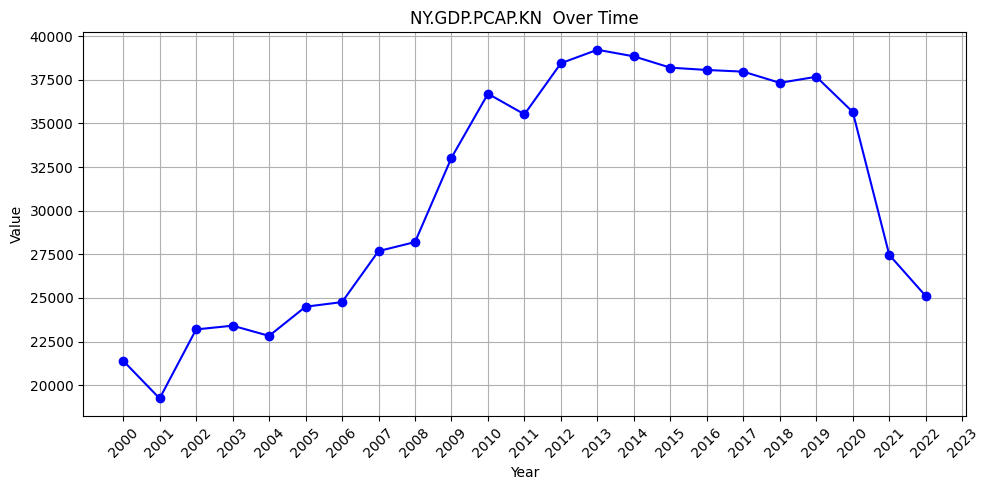

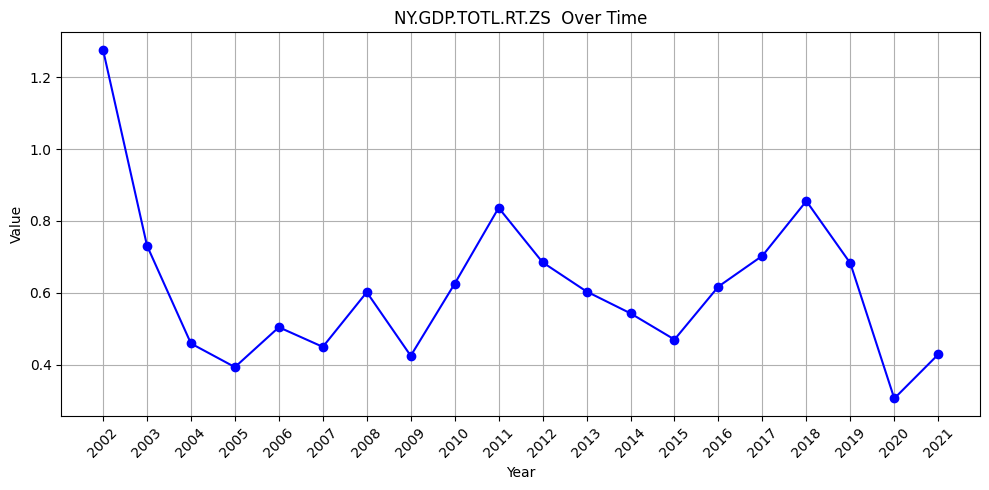

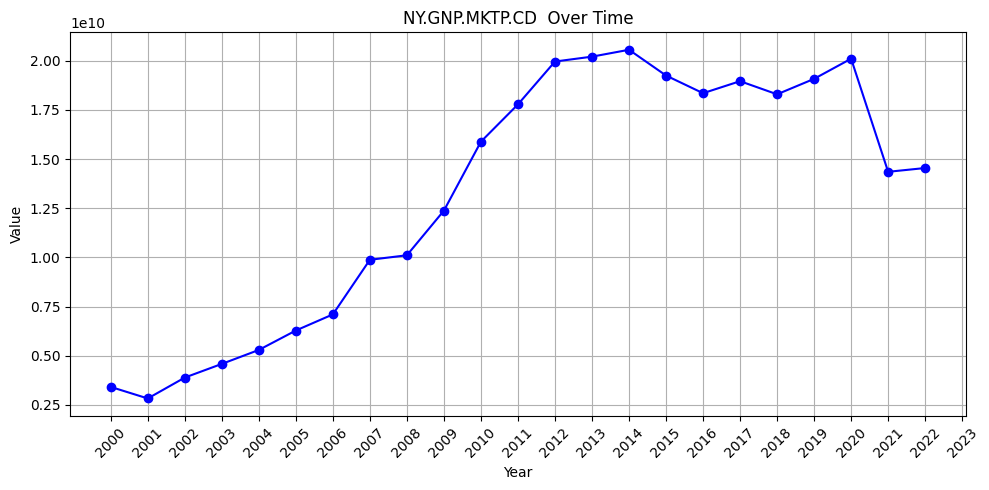

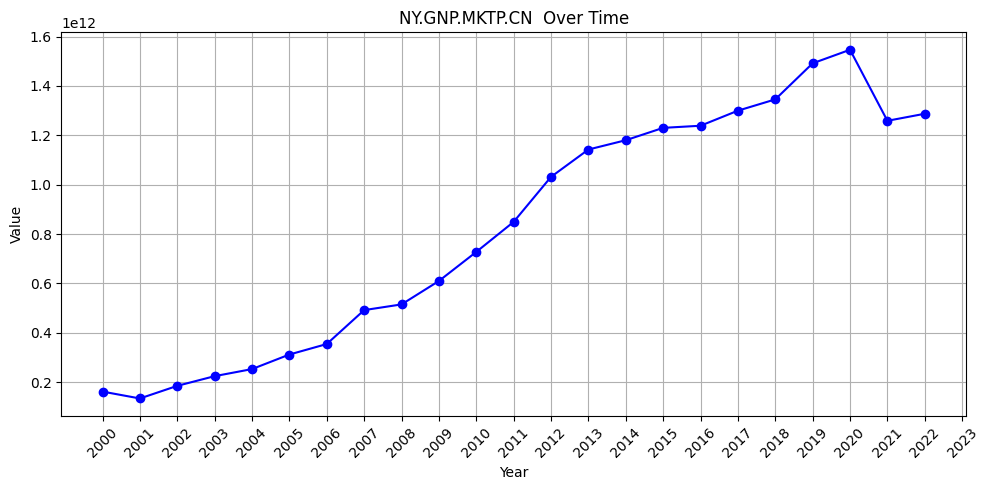

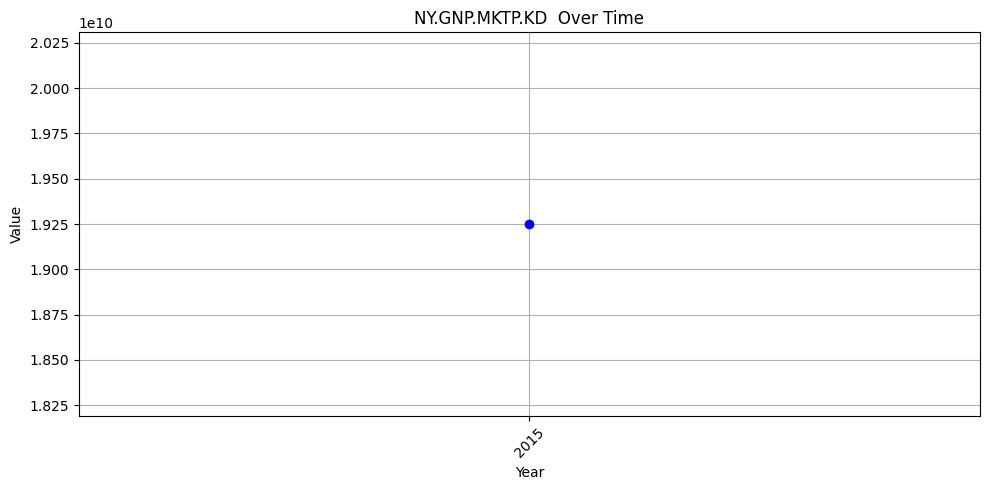

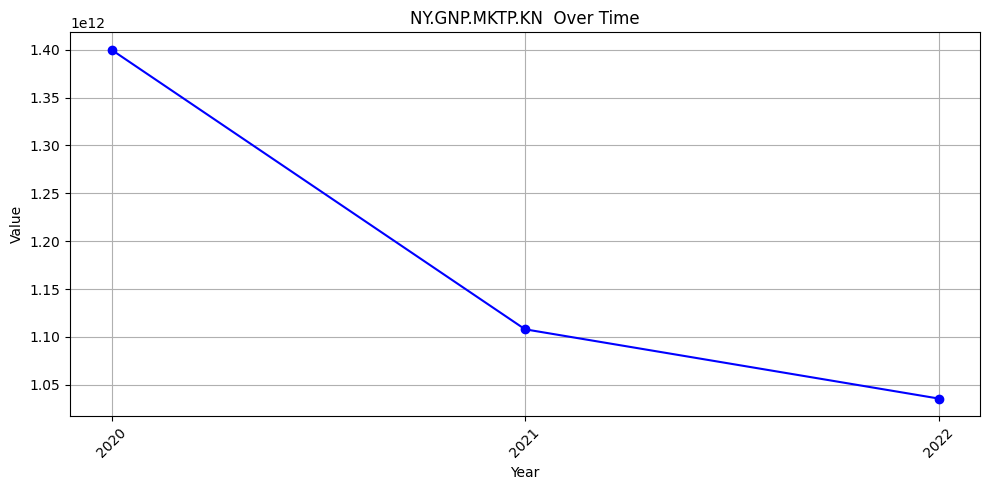

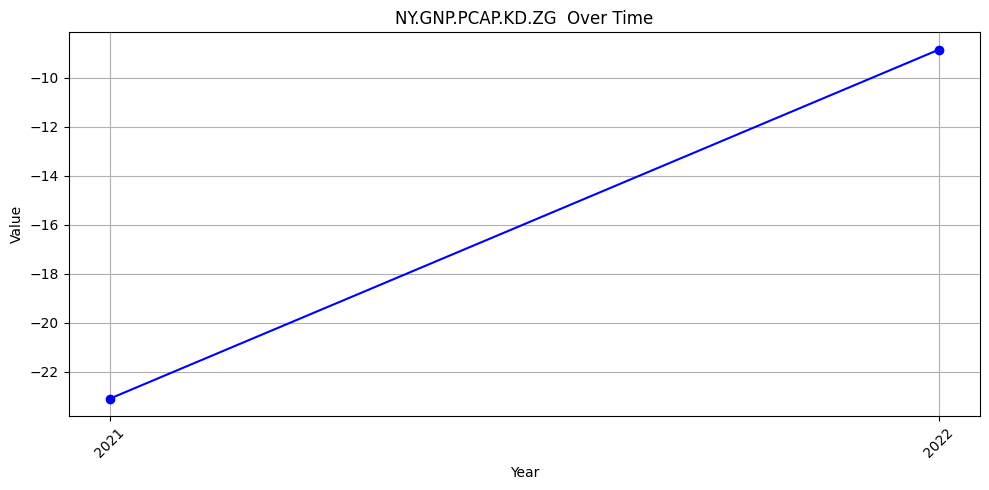

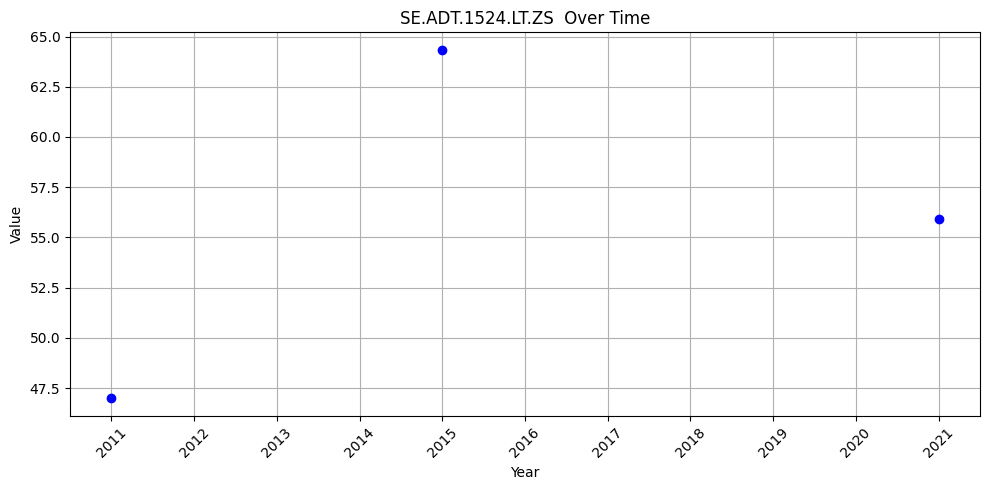

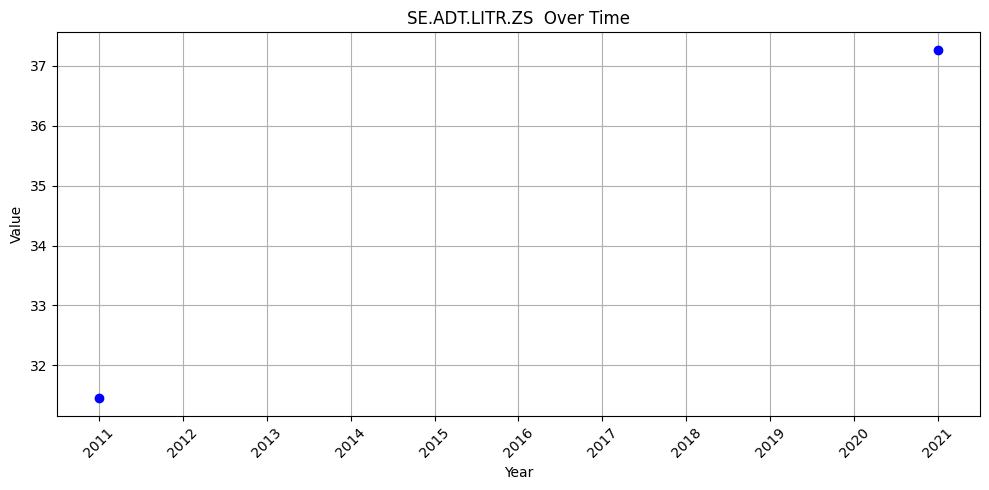

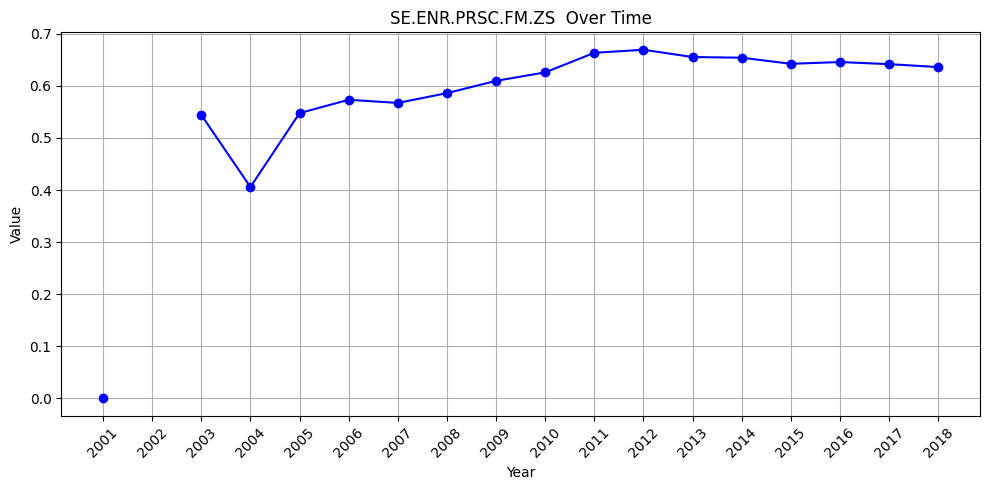

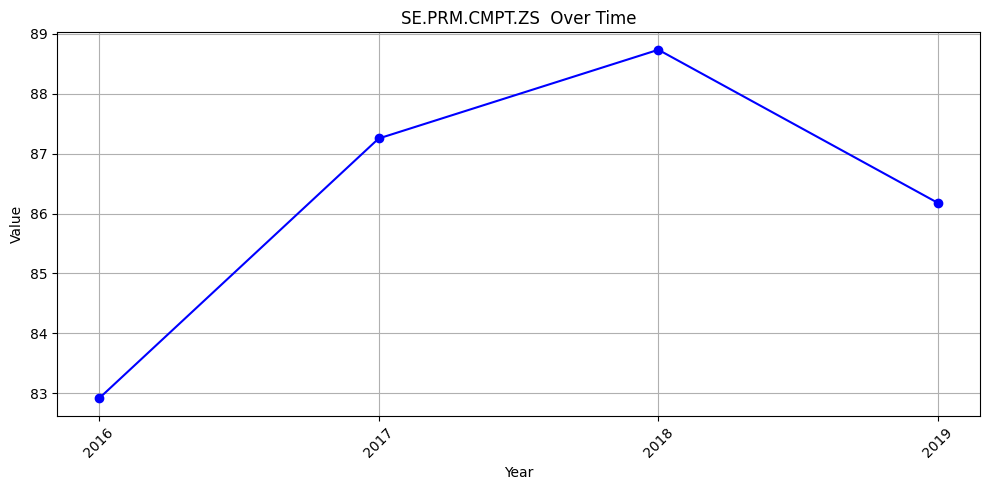

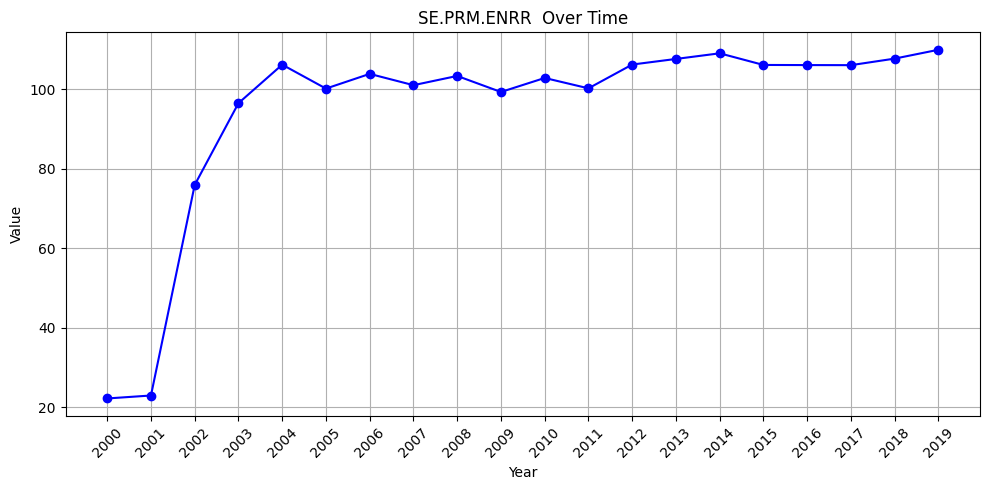

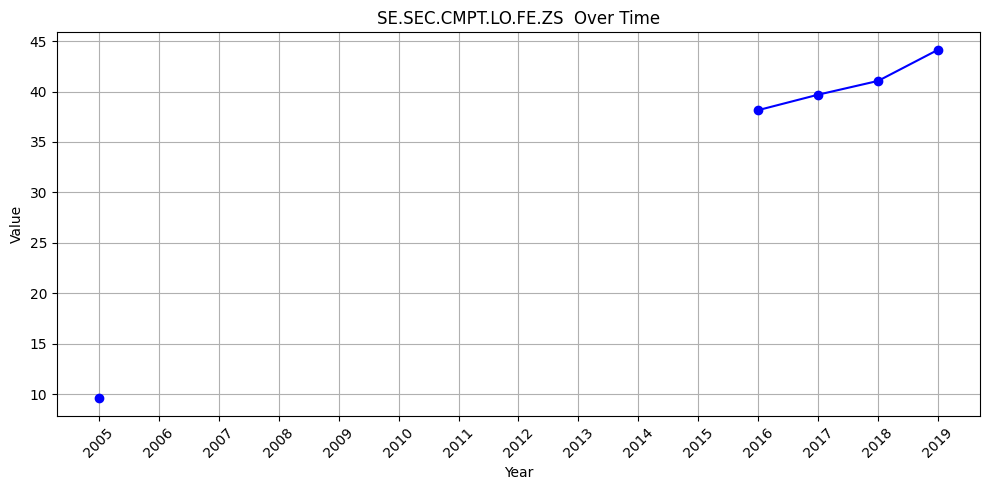

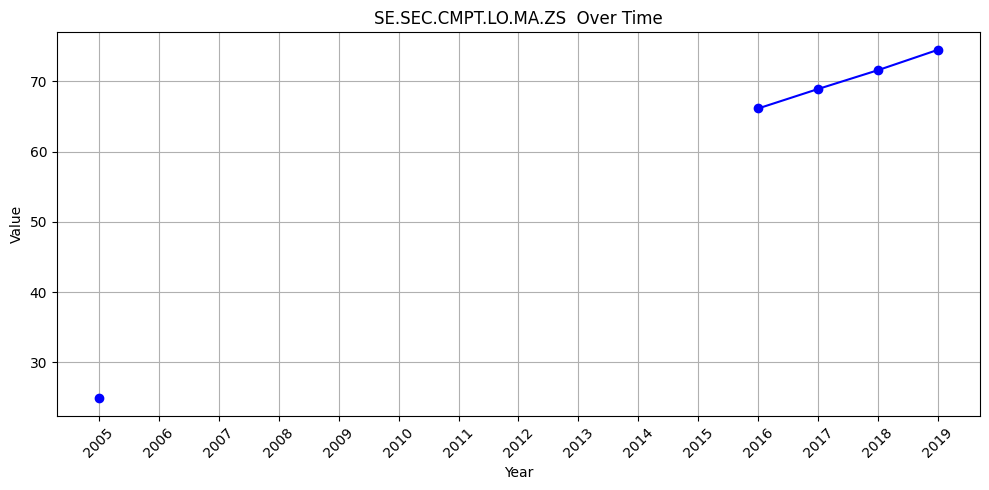

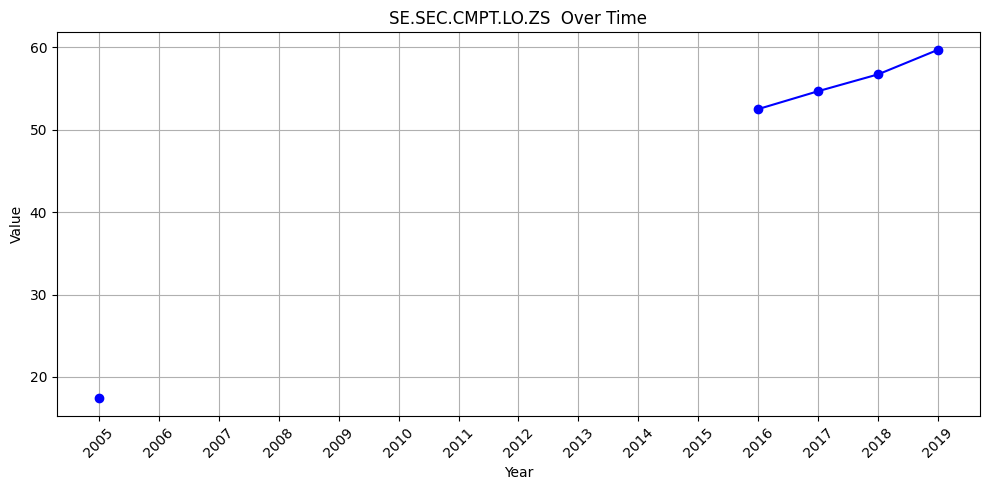

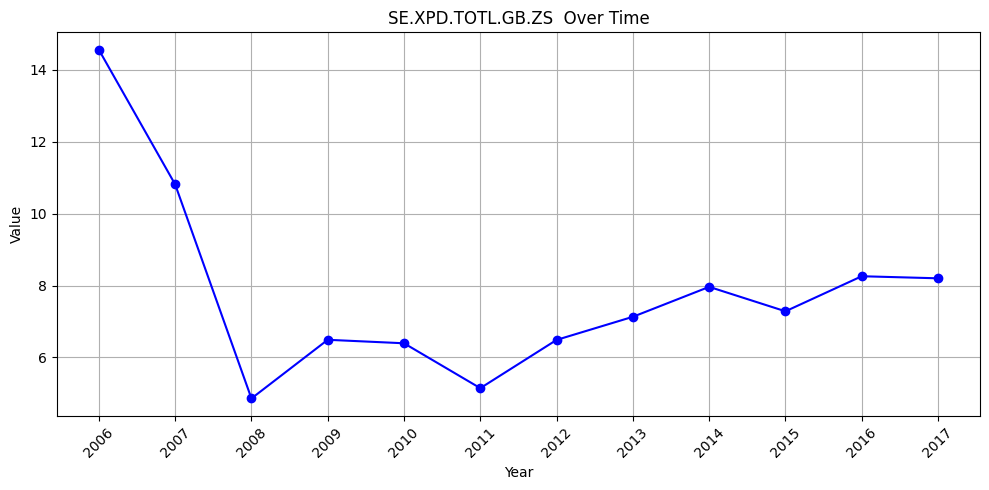

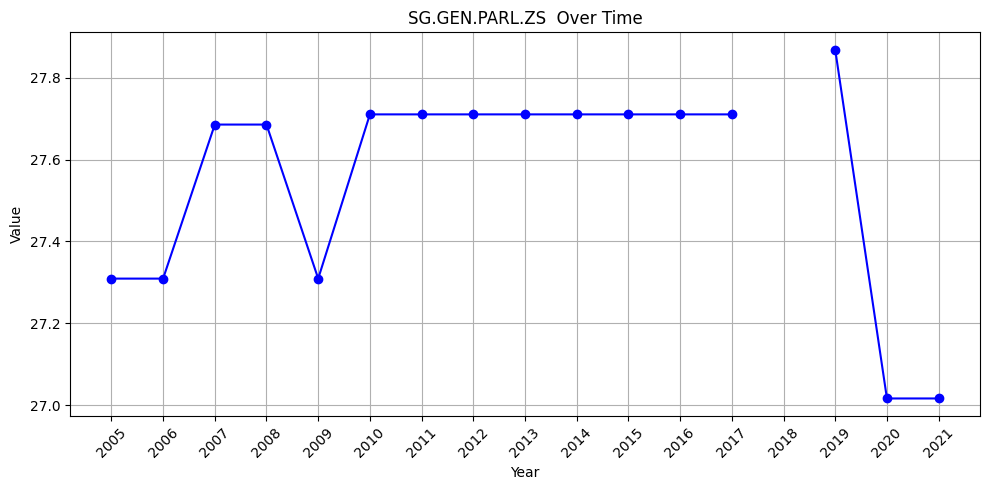

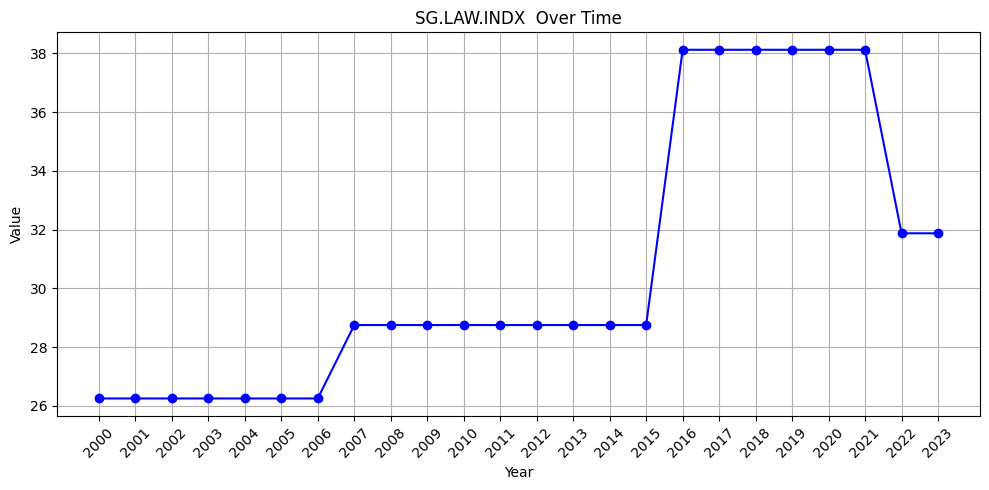

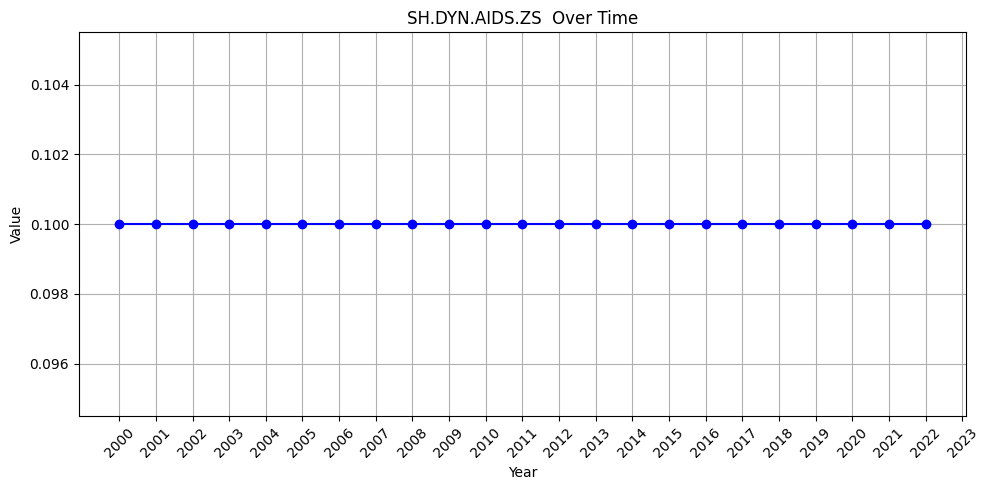

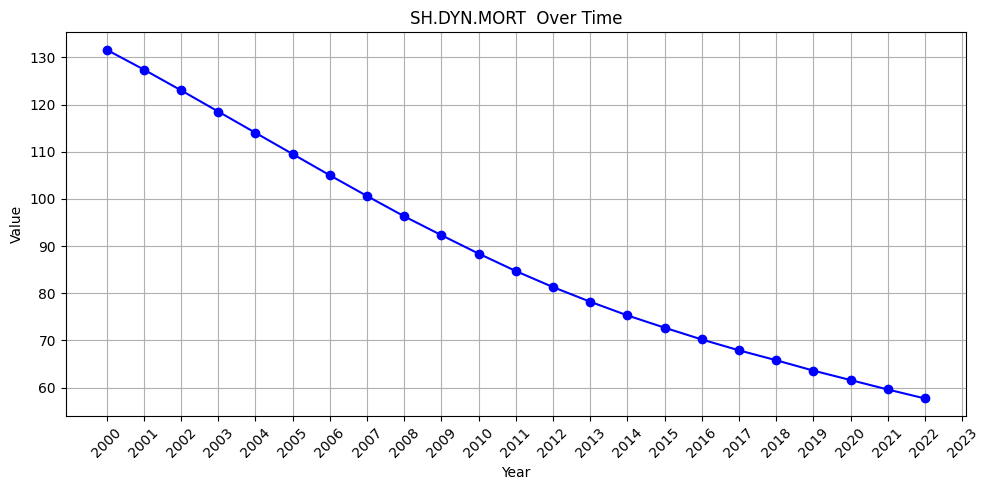

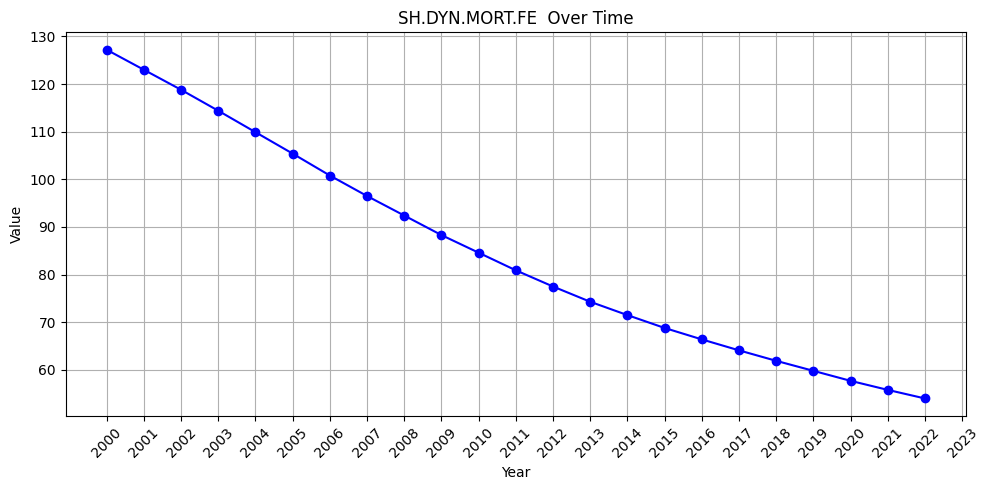

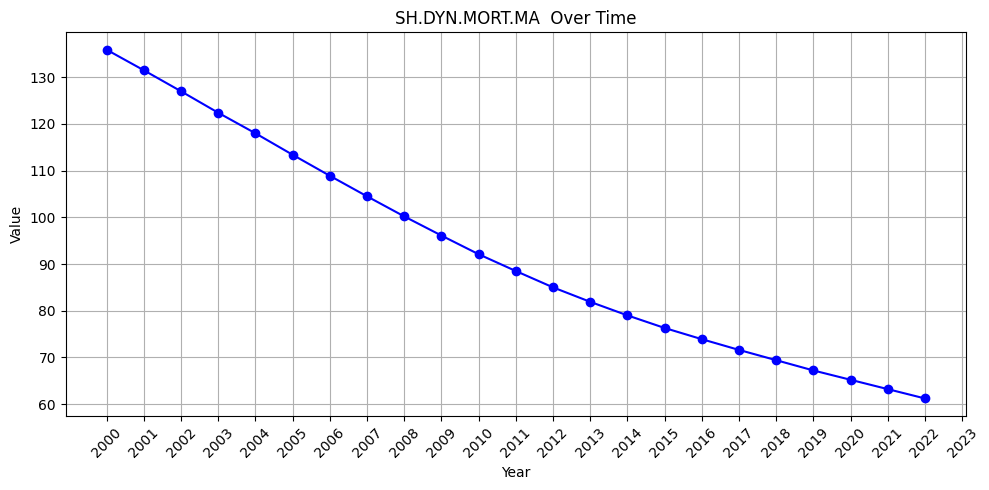

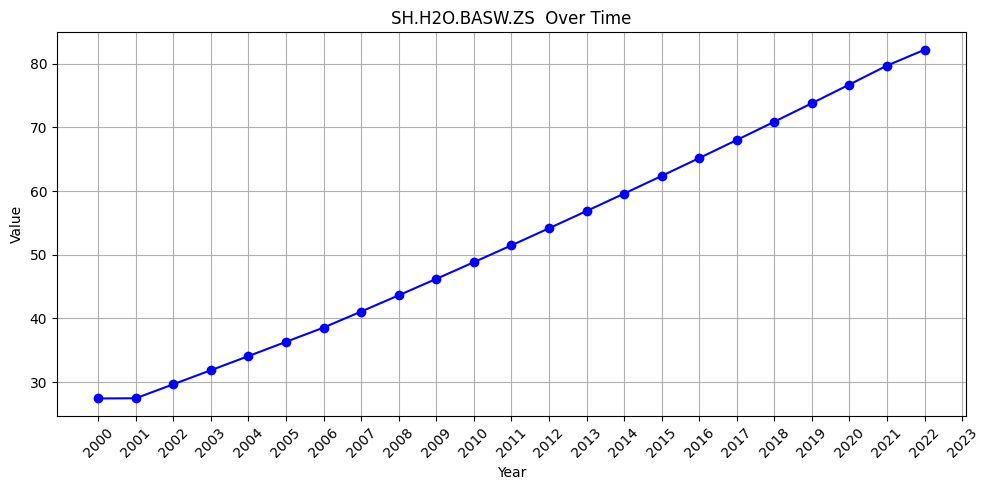

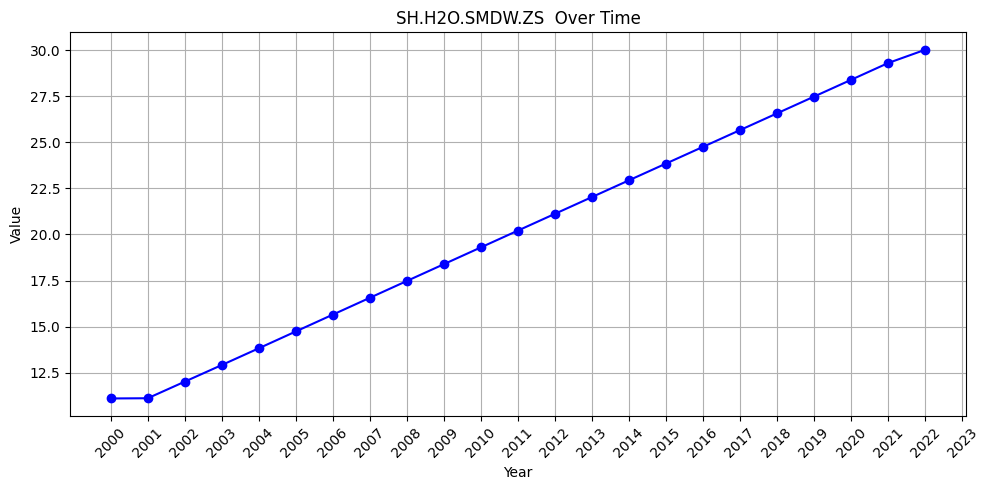

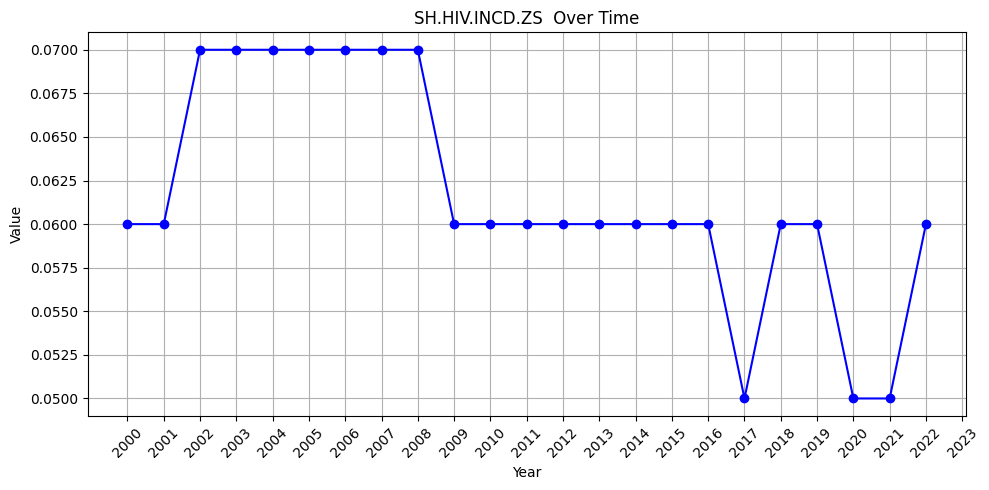

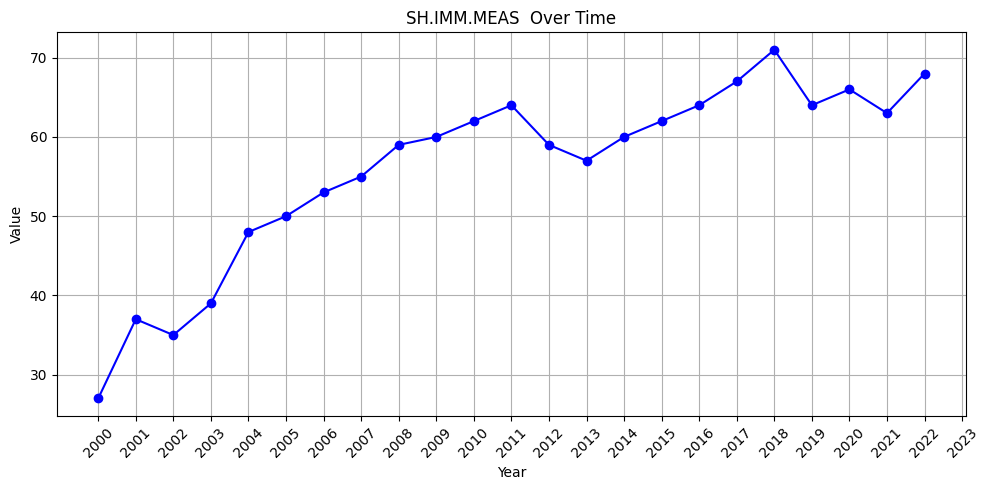

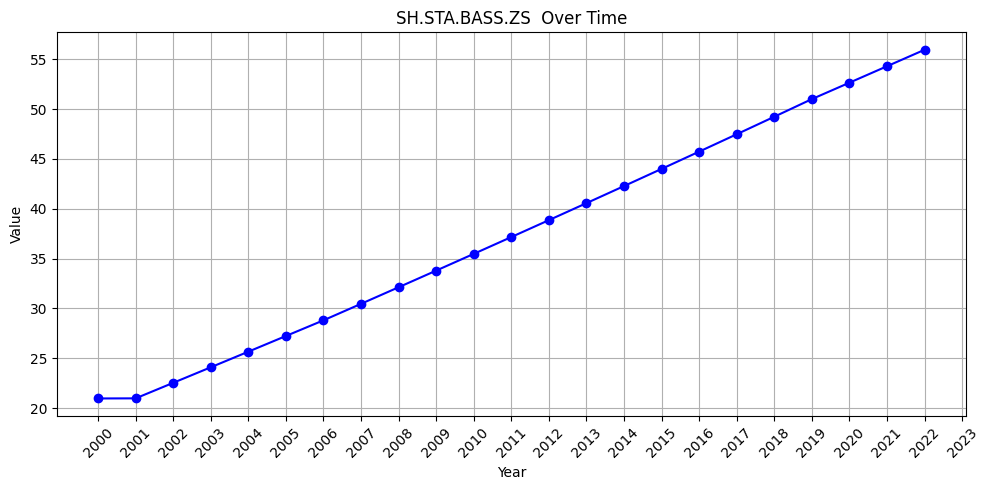

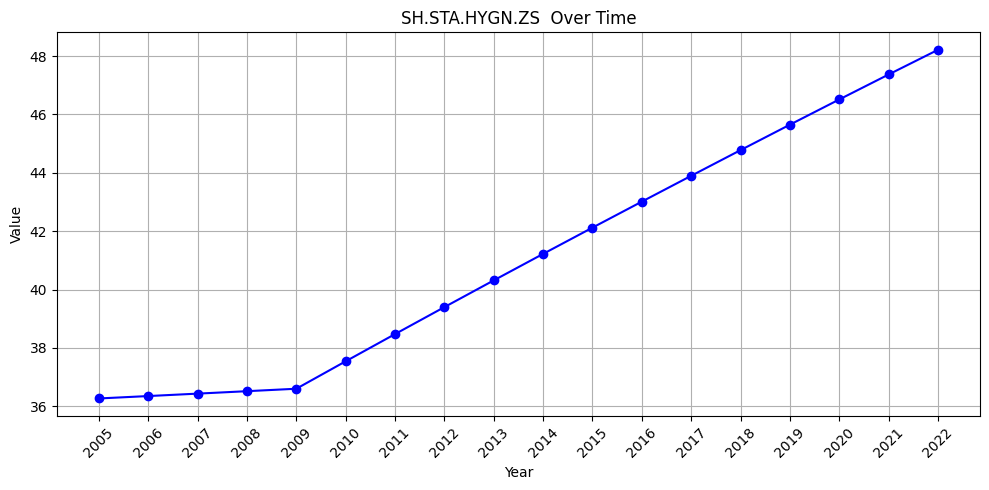

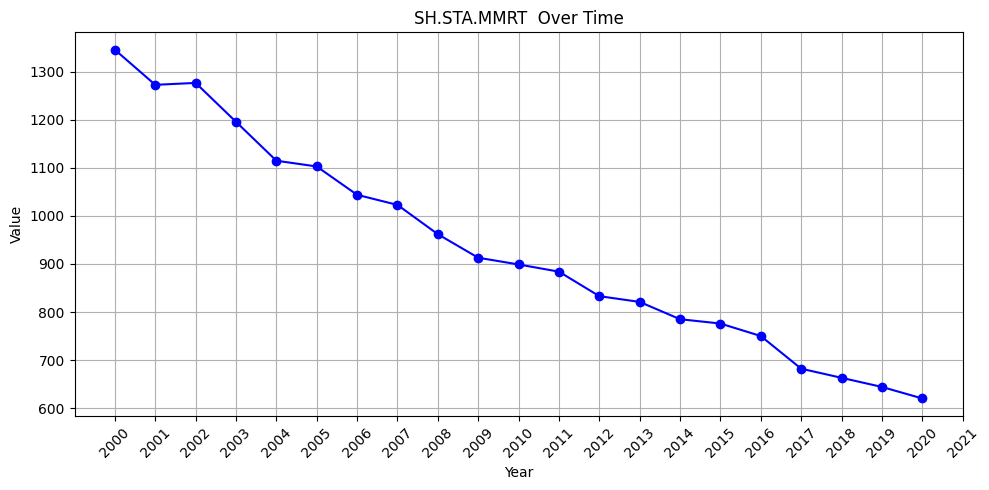

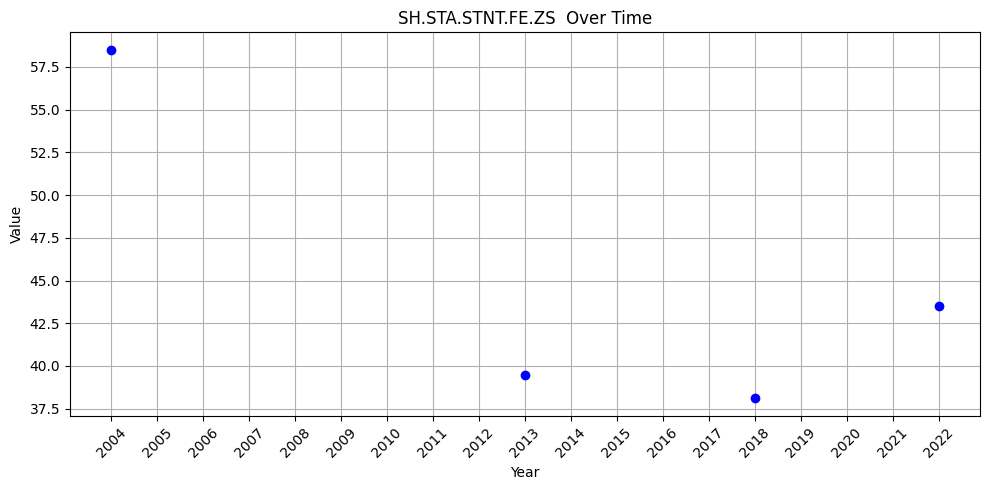

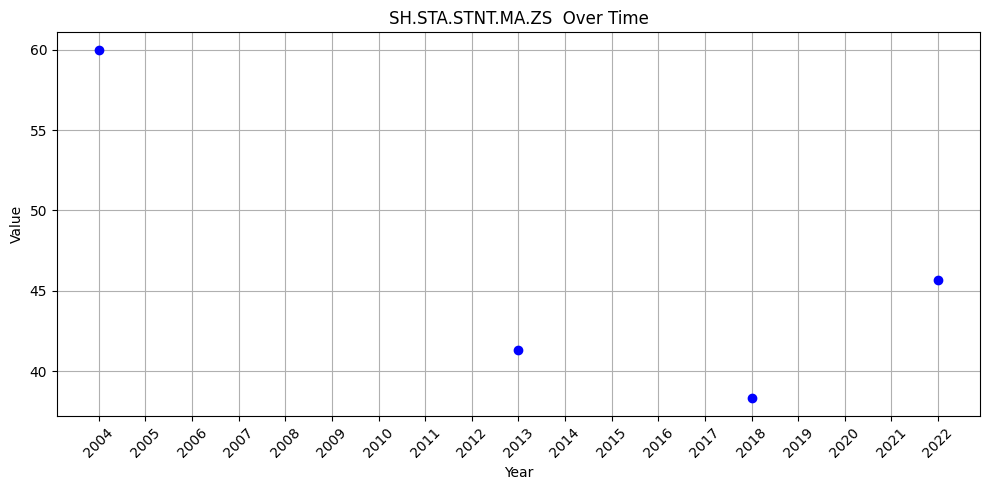

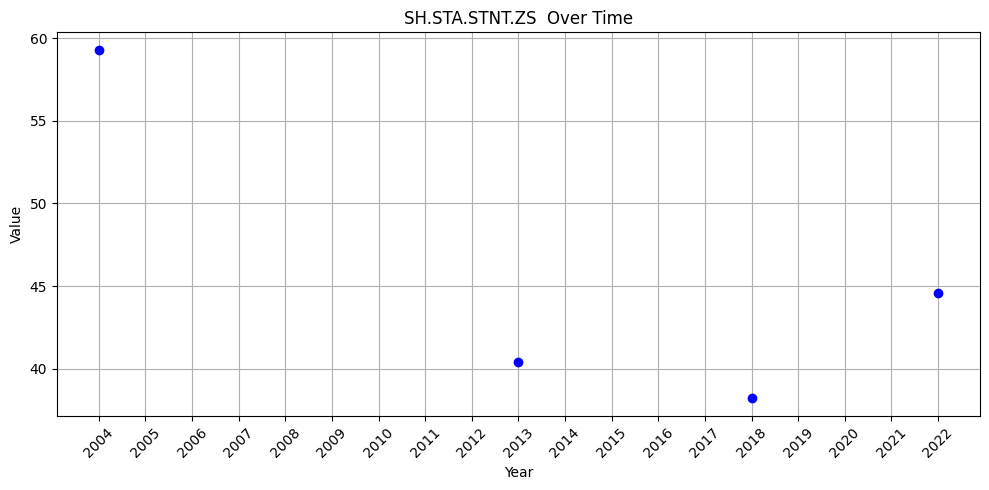

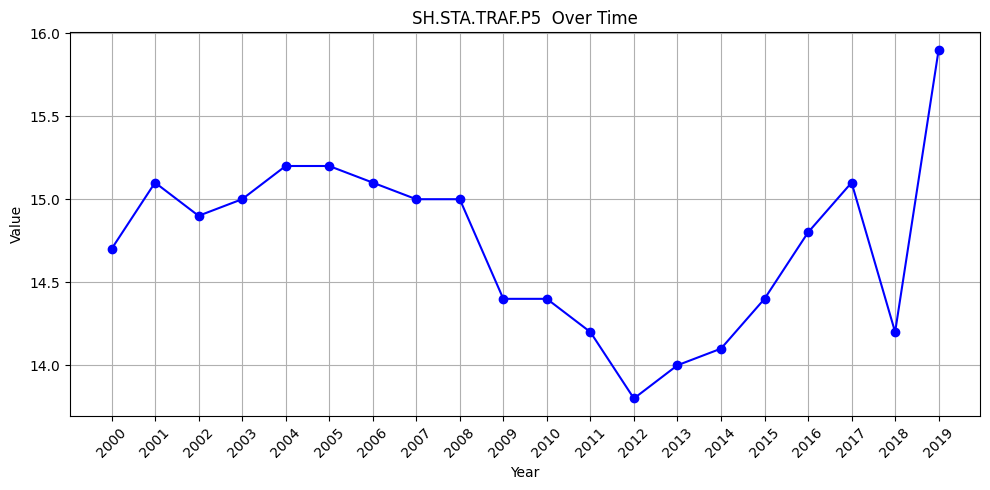

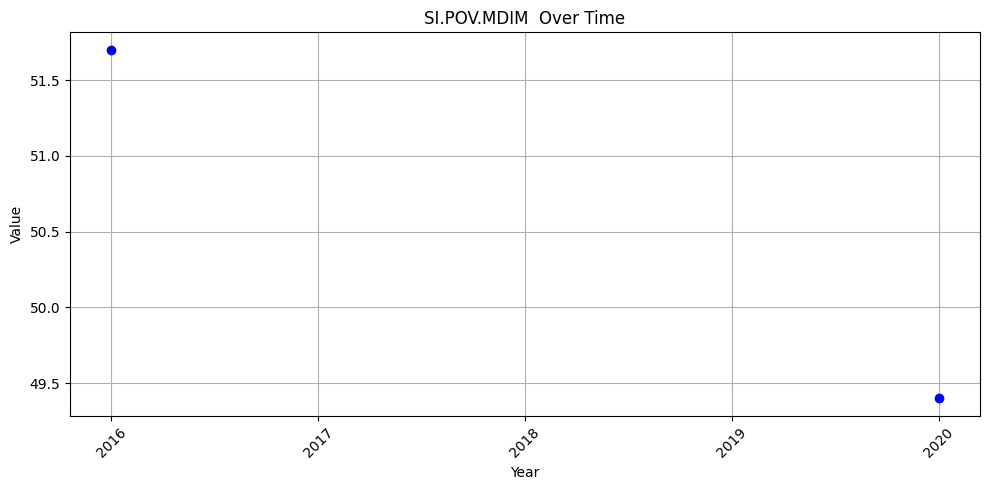

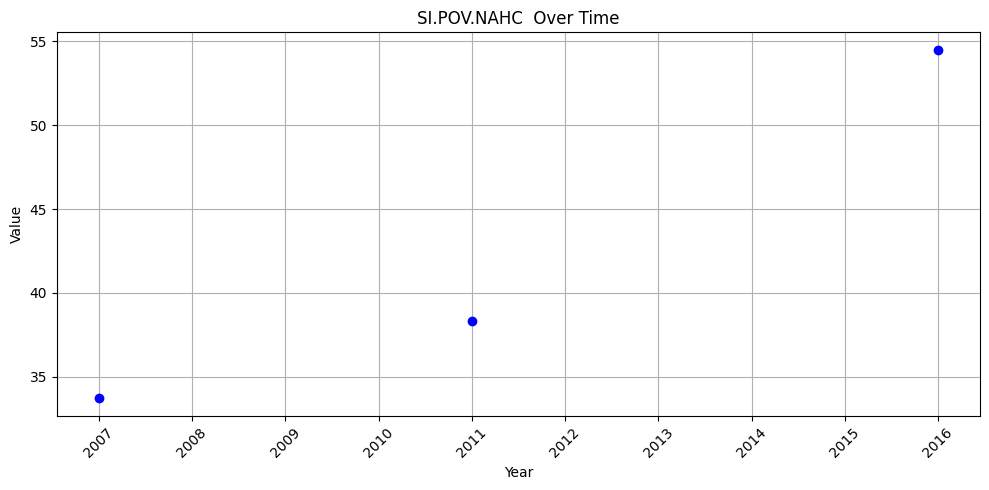

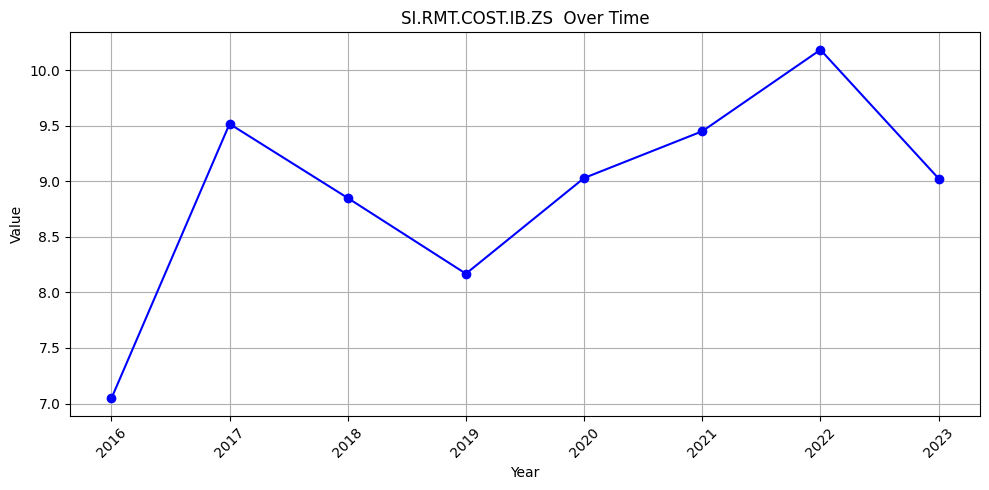

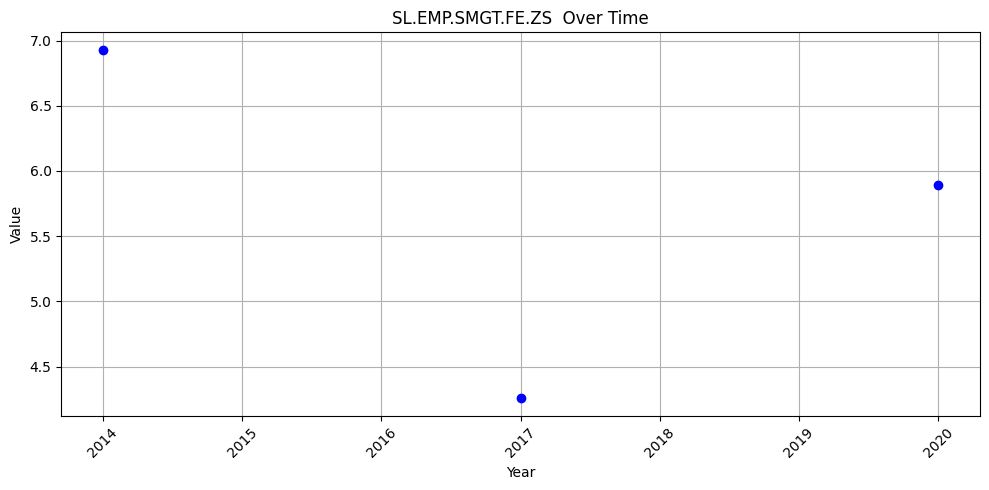

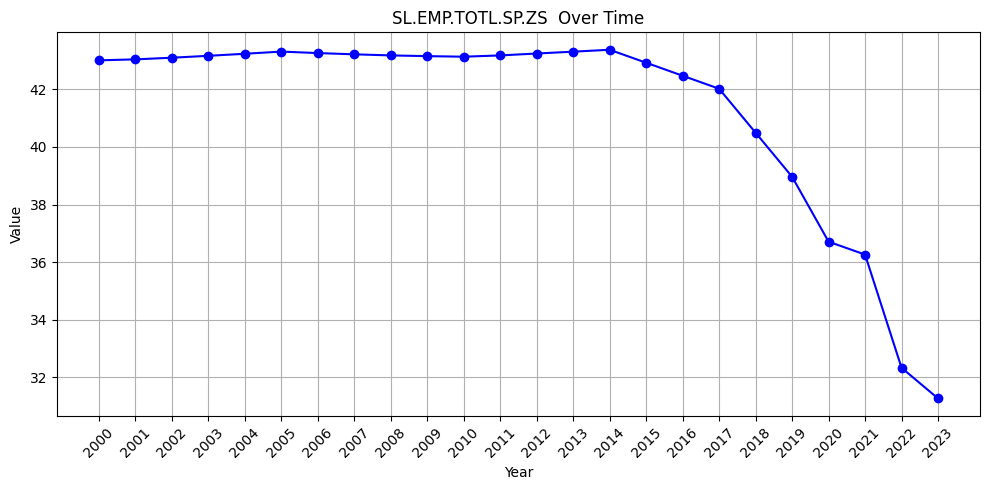

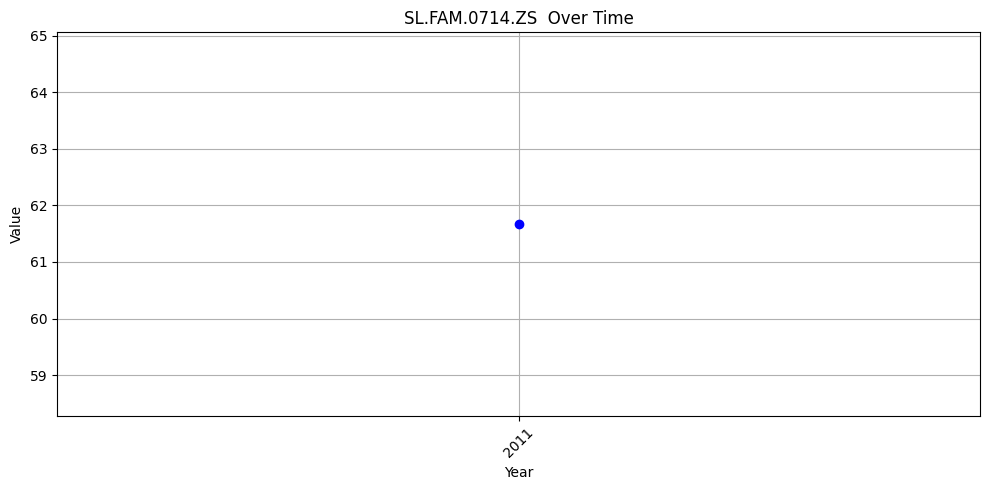

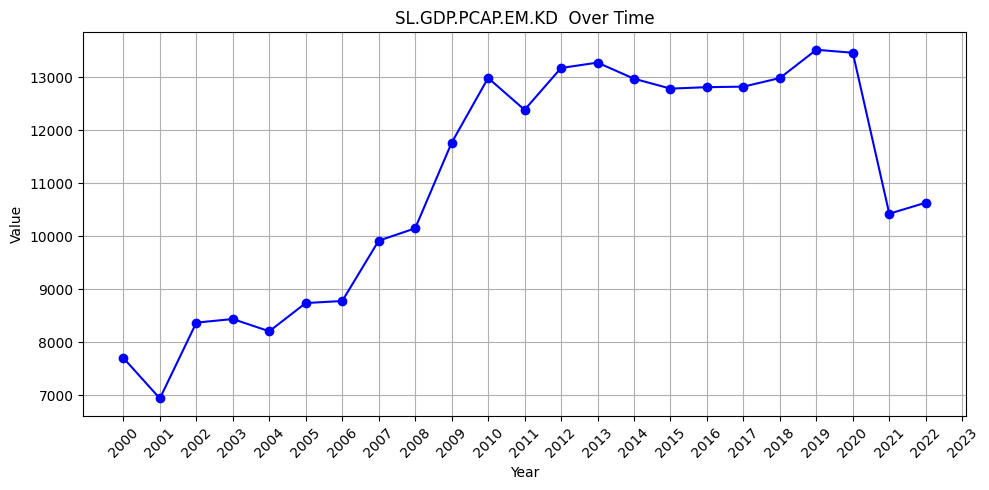

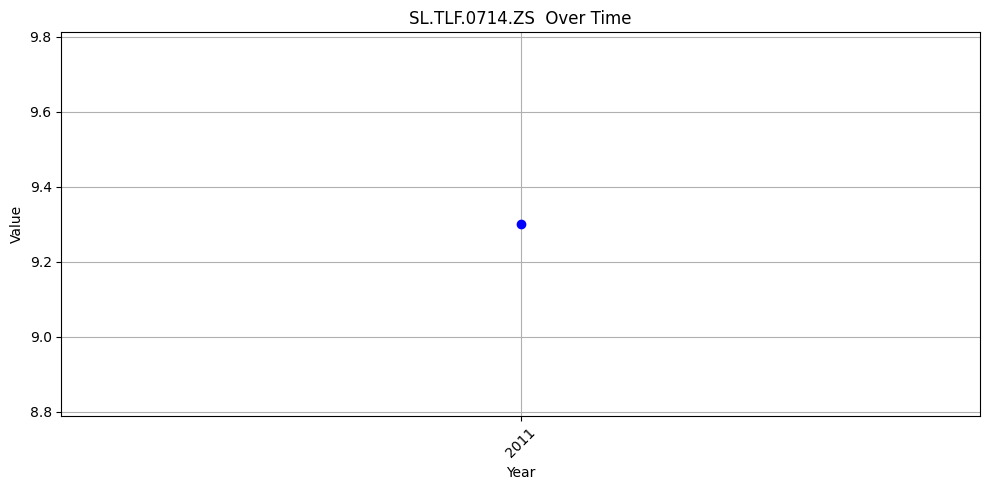

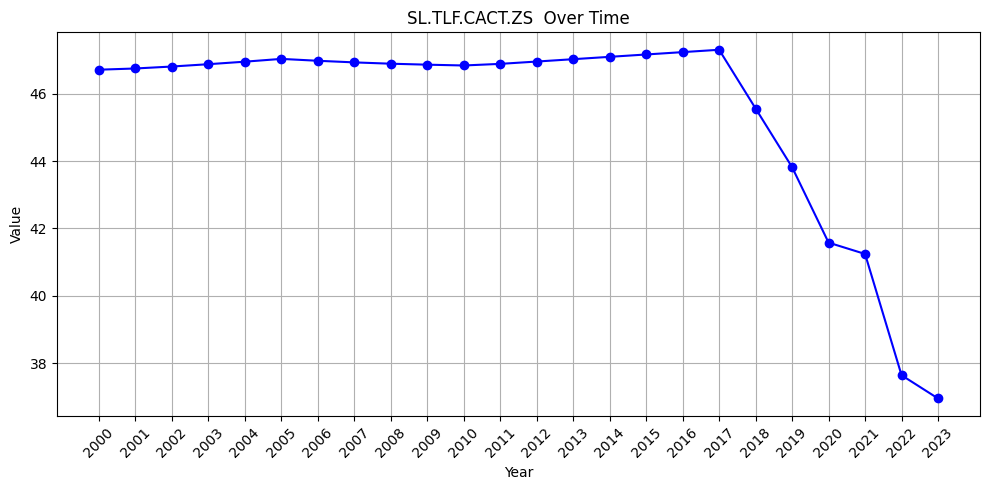

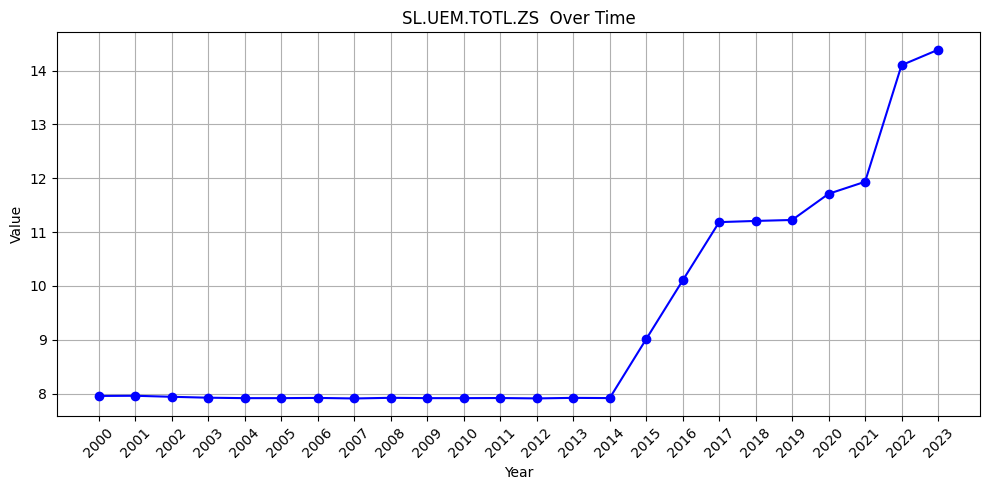

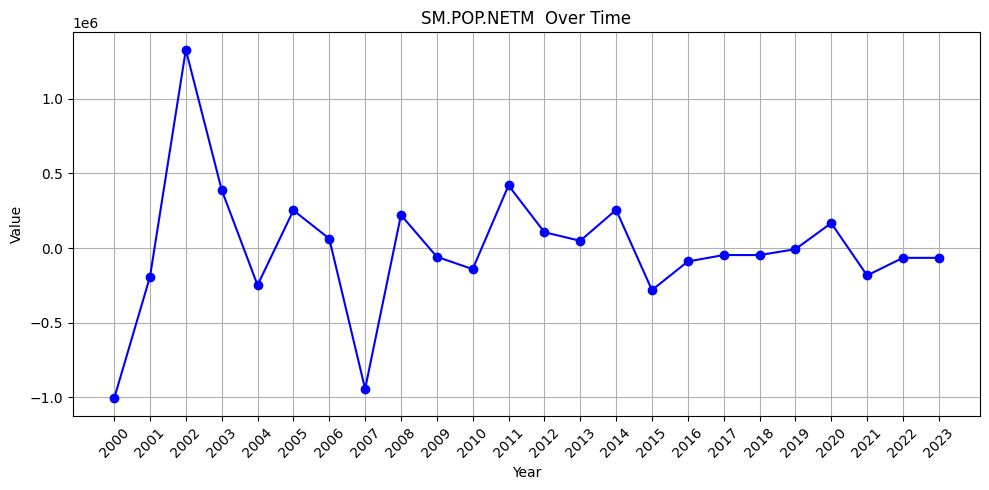

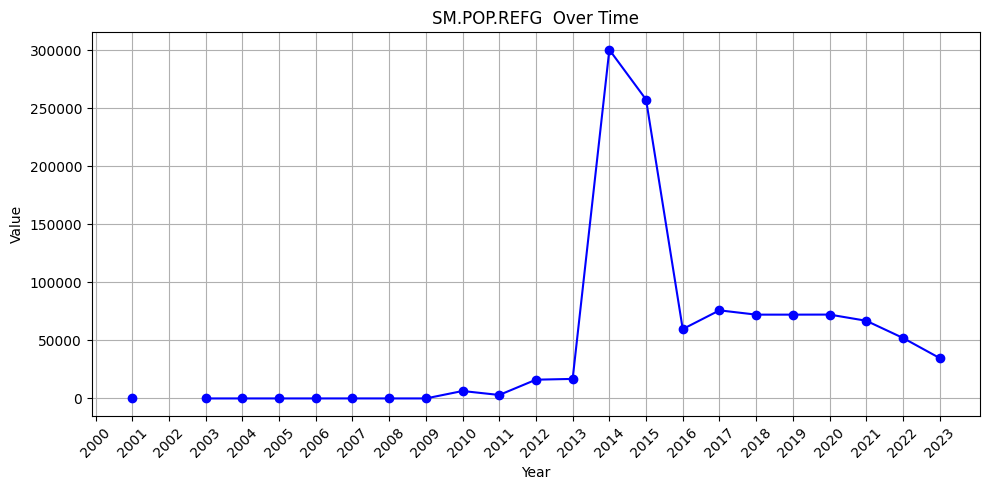

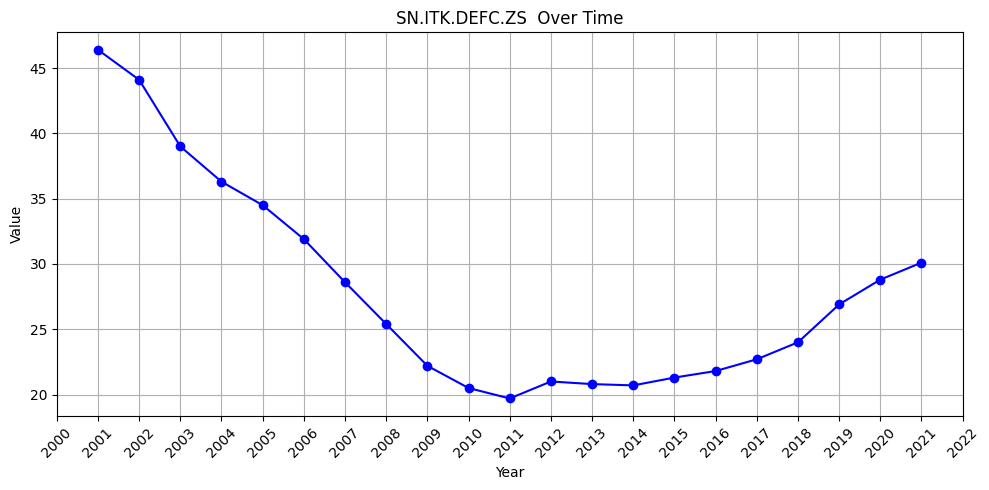

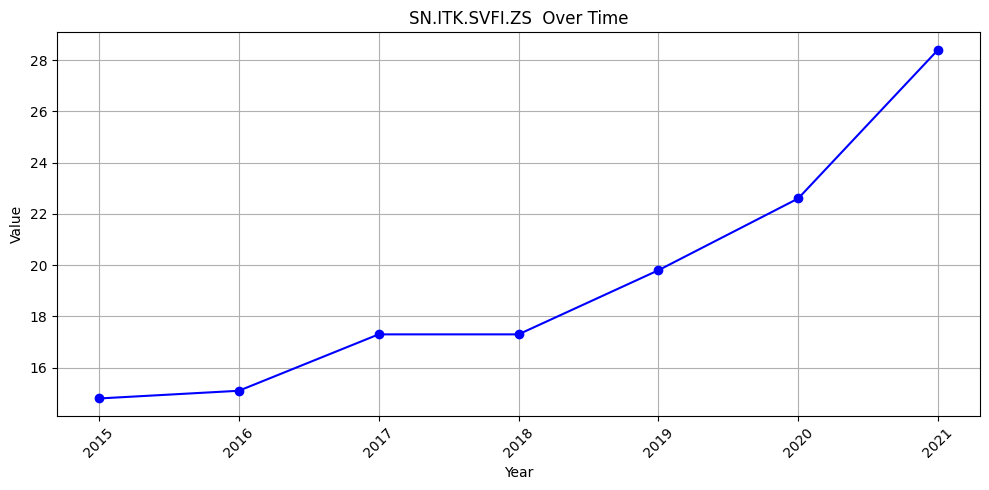

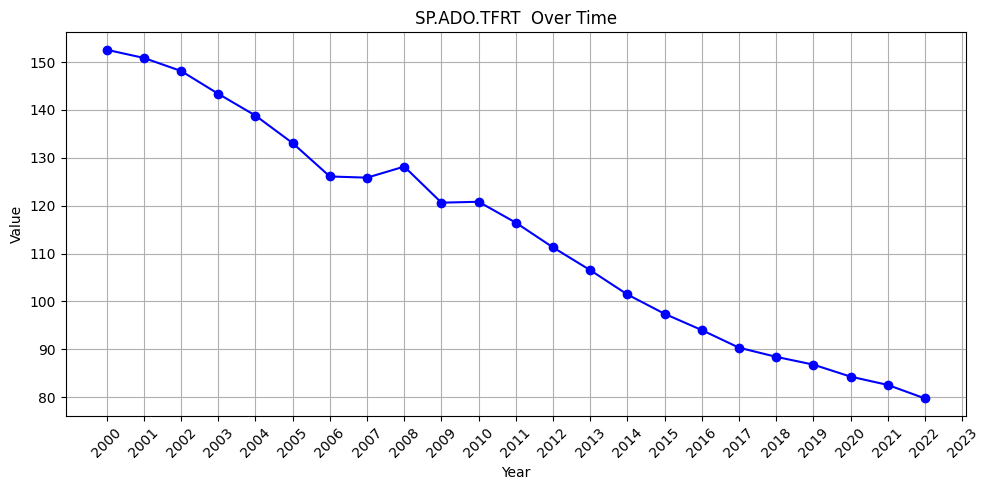

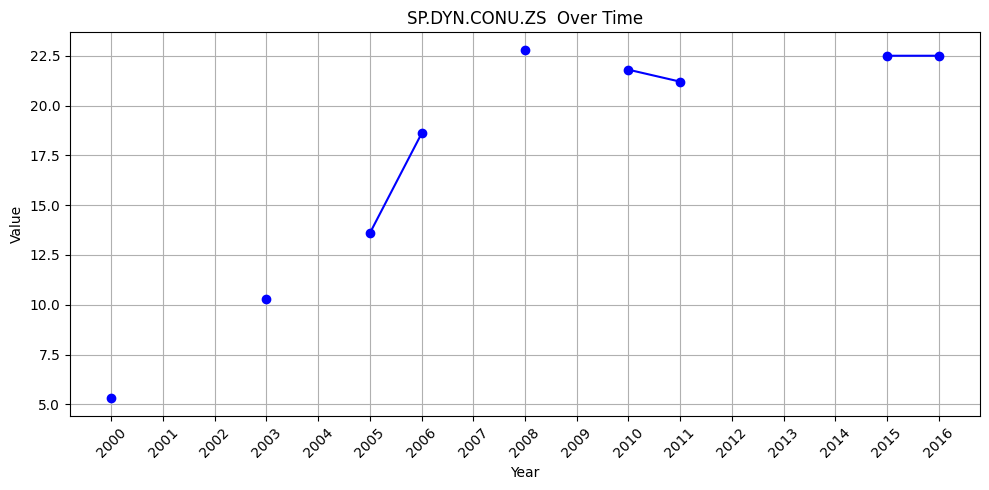

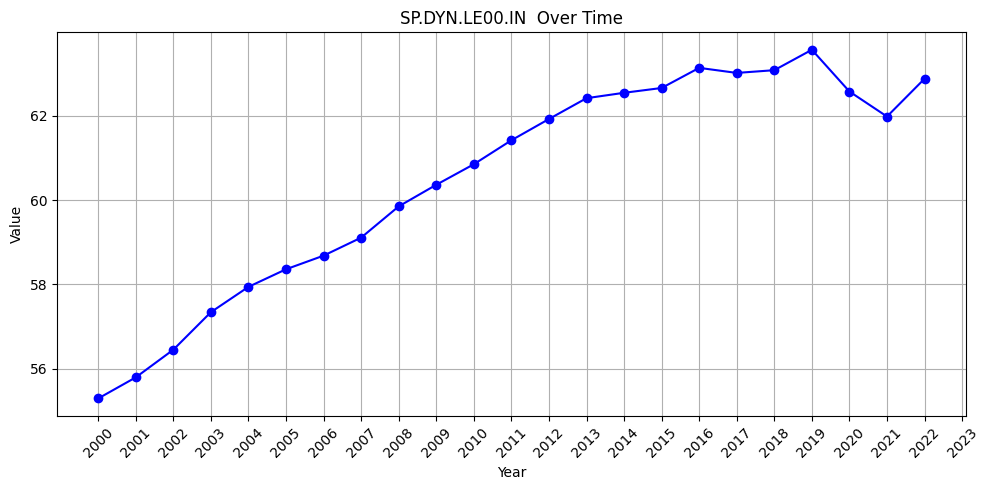

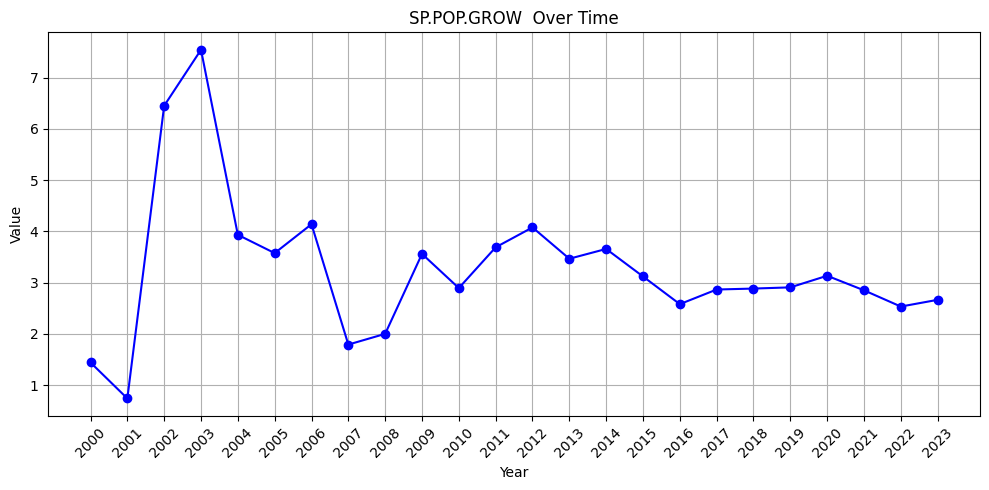

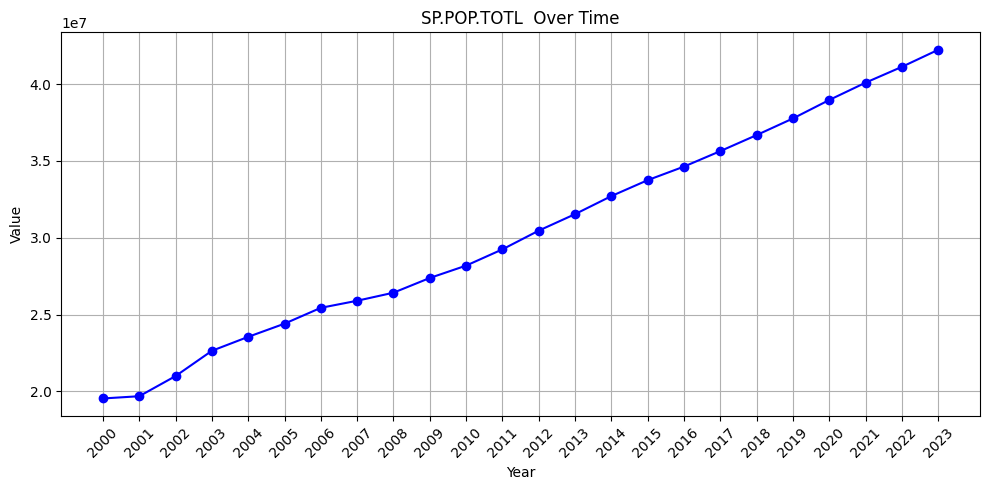

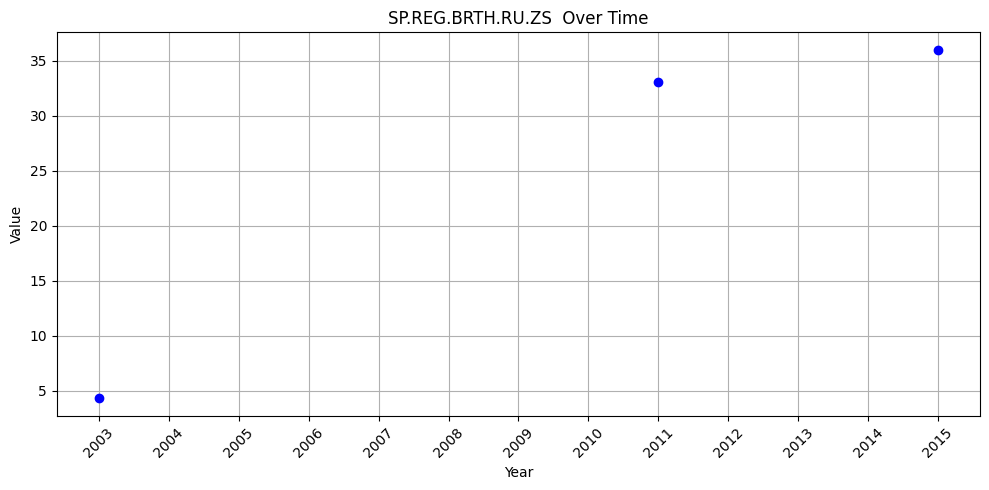

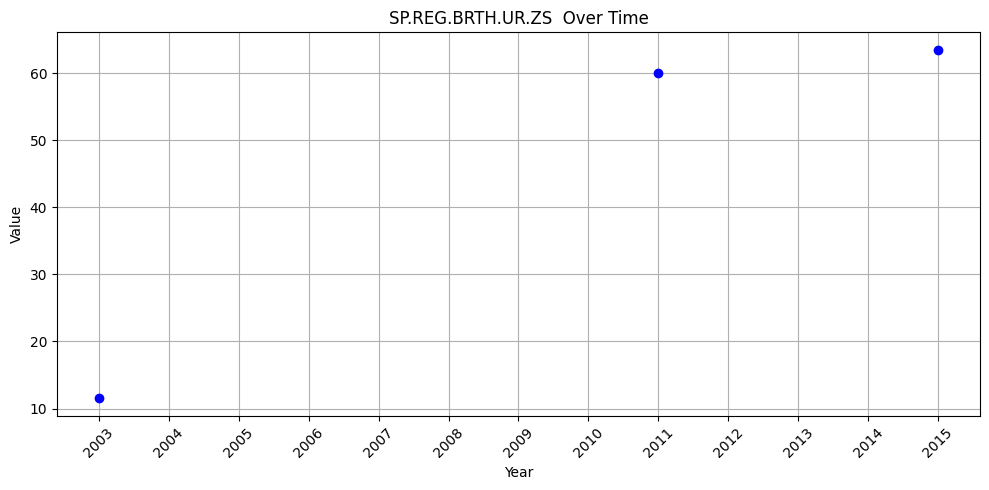

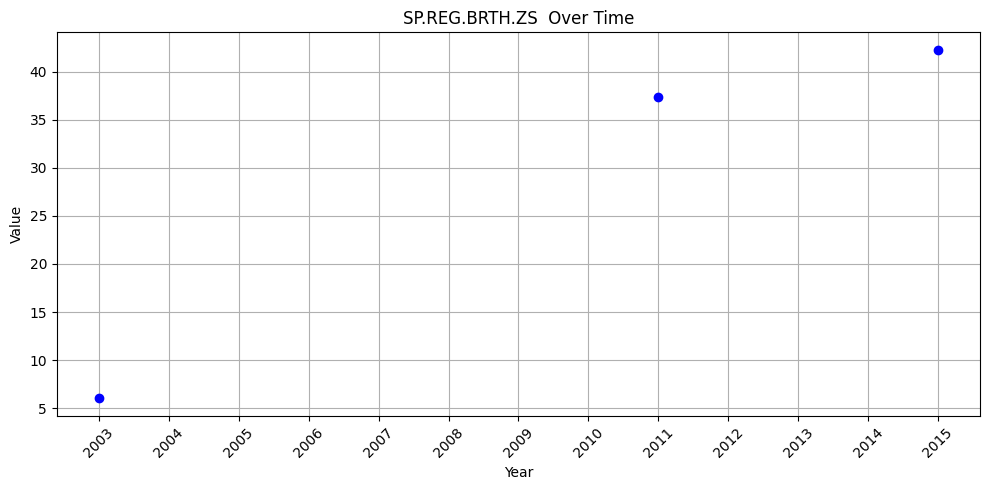

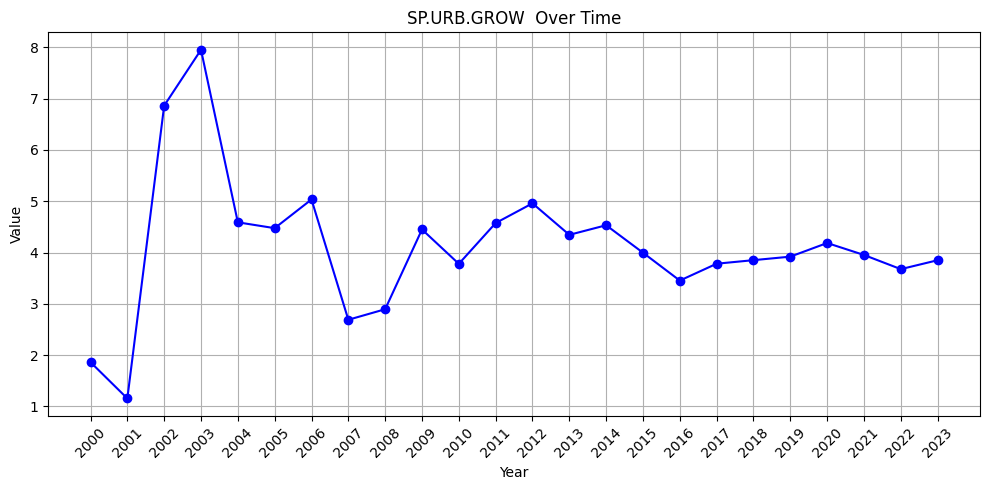

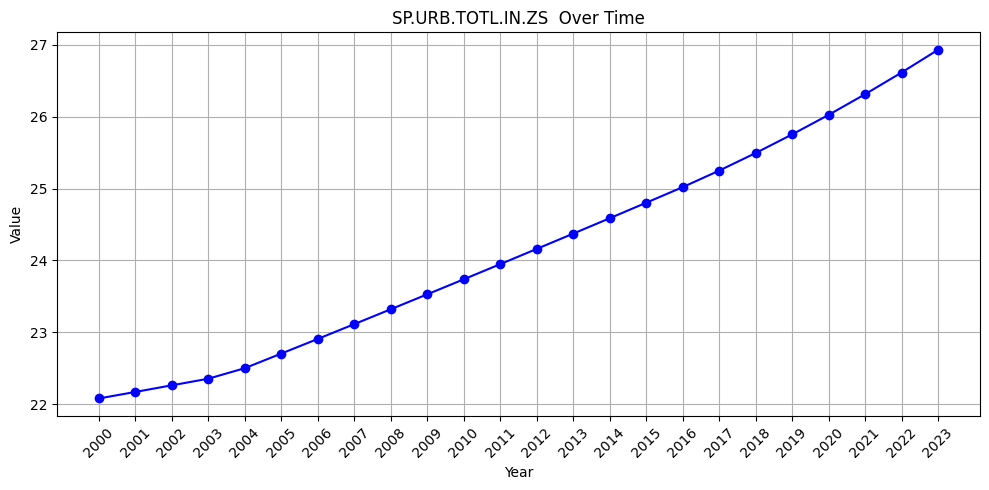

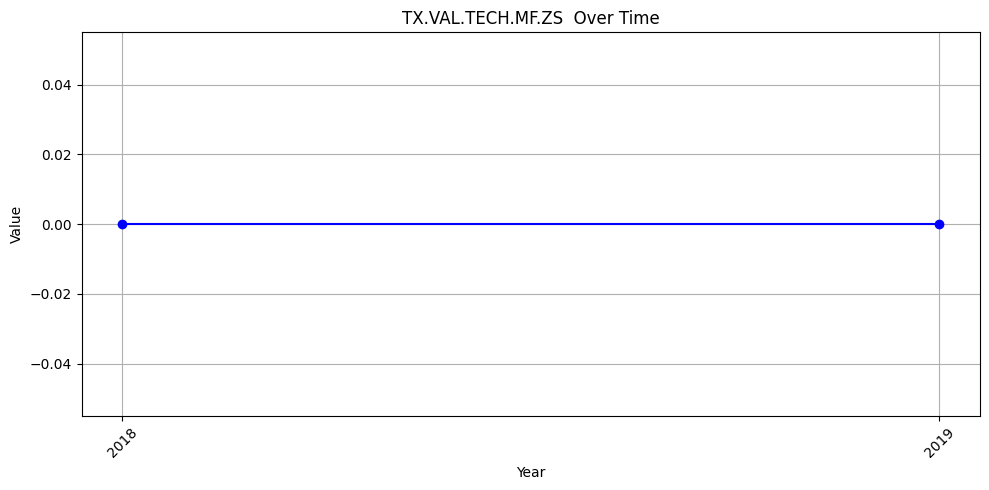

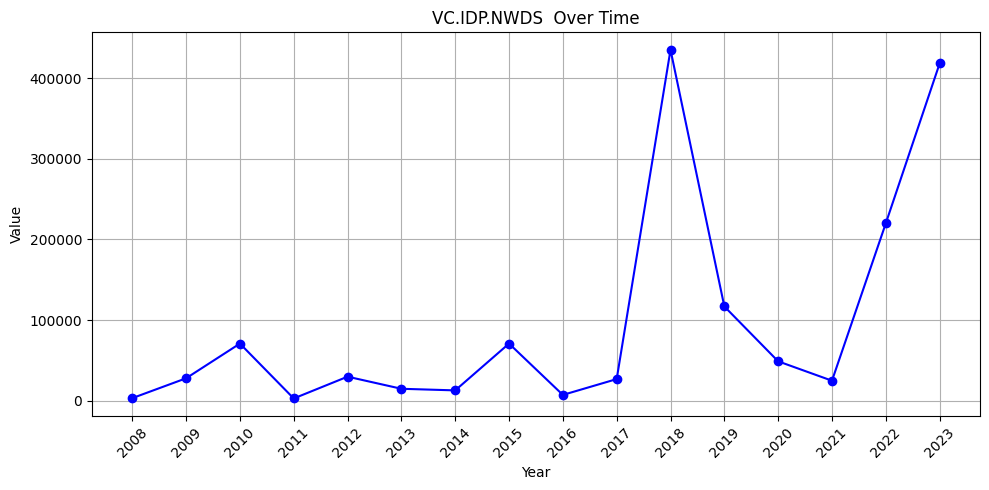

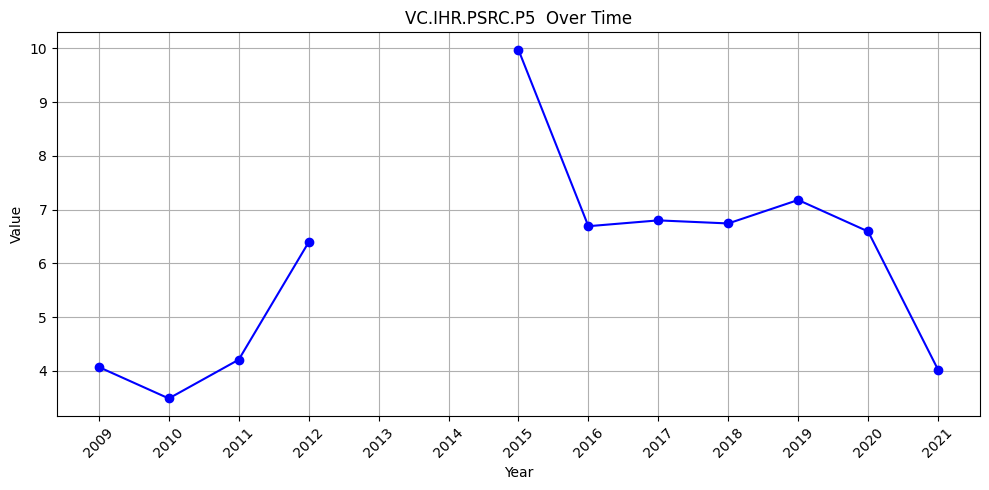

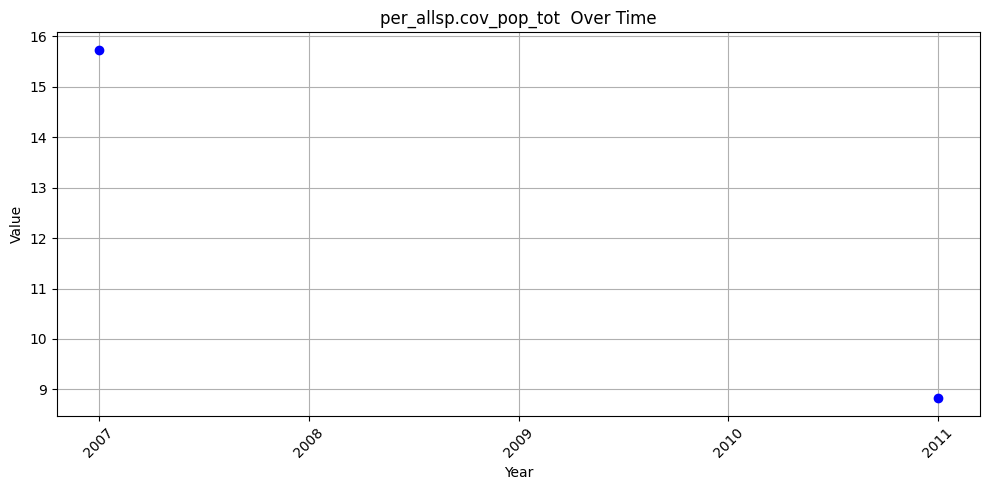

In [77]:
import matplotlib.pyplot as plt

# Extract the indicator data
indicator_data = data["indicator_data"]["jsonGraph"]["indicatorData"]

# Extract data for a specific country and indicator
country = list(indicator_data.keys())[0]

# Extract the list of indicators
indicators = list(indicator_data[country].keys())

# Loop through each indicator and plot its data in separate figures
for indicator in indicators:
    years = list(indicator_data[country][indicator].keys())
    values = [float(value) if isinstance(value, (int, float)) else float('nan') if value == {'$type': 'atom'} else float('nan') for value in indicator_data[country][indicator].values()]

    # Check if all values are nan
    if all(value != value for value in values):  # NaN values are not equal to themselves
        continue

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(years, values, marker='o', linestyle='-', color='b')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.set_title(f'{indicator}  Over Time')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

    plt.tight_layout()
    plt.show()



In [83]:
data["sectors_data"]["jsonGraph"][""]


{'countryMeta': {'Afghanistan': {'adminregion': {'$type': 'atom'},
   'en': {'$type': 'atom'},
   'id': {'$type': 'atom'},
   'incomelevel': {'$type': 'atom'},
   'locationType': {'$type': 'atom'},
   'locations': {'$type': 'atom'},
   'name': {'$type': 'atom'},
   'region': {'$type': 'atom'}}},
 'indicatorMeta': {'AG.LND.AGRI.ZS': {'License_Type': {'$type': 'atom',
    'value': 'CC BY-4.0'},
   'License_URL': {'$type': 'atom',
    'value': 'https://datacatalog.worldbank.org/public-licenses#cc-by'},
   'WDITable': {'$type': 'atom', 'value': '3.2'},
   'decimal': {'$type': 'atom', 'value': 1},
   'description': {'$type': 'atom'},
   'en': {'$type': 'atom',
    'value': {'Developmentrelevance': "Agricultural land covers more than one-third of the world's land area, with arable land representing less than one-third of agricultural land (about 10 percent of the world's land area). Agricultural land constitutes only a part of any country's total area, which can include areas not suitable fo